# NBA MVP Statistical Evolution (2015–2024)
**Project Notebook:** MVP Profiles in Context — Statistical Evolution and Changing Archetypes

**Data Source:** basketball-reference.com

**Notebook Focus:**
This notebook investigates how the statistical profiles of NBA Most Valuable Players (MVPs) have changed from 2015 to 2024. By analyzing metrics like points, assists, rebounds, shooting efficiency, and advanced stats, this work aims to answer the question:

    How have MVP winners' stat profiles changed over time, and what does this say about evolving MVP criteria?


This is one part of a larger group project examining how various aspects of NBA gameplay, recognition, and player roles have shifted in the modern era.

**What's Included:**
- Scrapes and processes MVP and league-wide data from 2015 to 2024

- Visualizes trends in offense, defense, and efficiency across MVPs

- Categorizes MVPs by archetype (e.g., Scorer, All-Around, Balanced, Defensive)

- Compares MVPs to their closest vote-getters (2nd and 3rd place)

- Analyzes how MVPs outperform league-wide averages across key stats

- Reflects on how these patterns illustrate a broader shift in what it means to be “Most Valuable” in the modern NBA

**Technical Features and Tools Used:**
- Web scraping with pandas.read_html to pull structured tables from Basketball Reference (no manual downloads)

- Dynamic season-based looping to collect and process yearly data (2015–2024) for MVPs and league-wide players

- Data cleaning and transformation:

    - Merging multi-level headers

    - Standardizing column names

    - Converting stats to numeric types

- Archetype classification using apply() with custom logic to group MVPs into role-based categories

- Z-score normalization to analyze standardized performance across metrics

- Data reshaping using melt() for multi-variable time-series visualizations

- Grouping and aggregation with groupby() to calculate average stats by MVP rank

- Automated saving of plots and CSVs into structured folders (Julissa_Visuals/)

- Custom visualizations using:

    - matplotlib and seaborn for trendlines, comparisons, and radar charts

    - Customized bar plots with stat comparisons, regression overlays, and labeled annotations



# PART 1: MVP Data Collection and Preparation

## Section 1: Setup

**1.1 Import Libraries**

This block imports all core Python libraries used throughout the analysis. These include tools for data wrangling, statistical analysis, and data visualization.

- `pandas` and `numpy` are used for data manipulation
- `matplotlib` and `seaborn` handle visualizations
- `scipy.stats.zscore` is used to normalize stats across MVPs
- `os` manages folder creation and file organization
- `IPython.display` used to create individual markdown boxs for blocks of code producing multiple graphs 
- `math` is used for using pi in a calculation

In [67]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import os 
from IPython.display import display, Markdown
from math import pi 


In [87]:
#running that cell will execute a terminal command 
!pip install lxml

### SECTION 2: Load & Clean MVP Data

### Data Collection and Cleaning

The MVP data was scraped directly from Basketball Reference’s official MVP table. Due to the multi-level nature of the HTML table headers, the columns were flattened and renamed for consistency. Irrelevant columns were removed, and key performance metrics were standardized across all years.

This section focuses solely on regular-season MVP performance from 2015 to 2025. Seasons impacted by COVID-19 (notably 2019–2020 and 2020–2021) were retained but considered during interpretation.


## SECTION 1.1: Scraping and Loading Data

In [20]:
### DATA LOADING ###
# Scraping wedsite data for MVP data using pandas (pandas.read_html)

# Define the URL with MVP data
mvp_url = "https://www.basketball-reference.com/awards/mvp.html"

# Use pandas to read all tables from the page
mvp_tables = pd.read_html(mvp_url)

# Extract the first table (MVP winners) being that this table fits the timeframe of this project
mvp_df = mvp_tables[0]

print(mvp_df.head())

  Unnamed: 0_level_0 Unnamed: 1_level_0       Unnamed: 2_level_0  \
              Season                 Lg                   Player   
0            2024-25                NBA  Shai Gilgeous-Alexander   
1            2023-24                NBA             Nikola Jokić   
2            2022-23                NBA              Joel Embiid   
3            2021-22                NBA             Nikola Jokić   
4            2020-21                NBA             Nikola Jokić   

  Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0  \
              Voting                Age                 Tm                  G   
0                (V)                 26                OKC                 76   
1                (V)                 28                DEN                 79   
2                (V)                 28                PHI                 66   
3                (V)                 26                DEN                 74   
4                (V)                 

**2.2 Clean MVP Table Columns**

#### Understanding the Column Headers in Our MVP Data


When loading the MVP stats table from basketball reference, the table has **two rows of column headers**. This means that pandas reads it as a table with something called a **"multi-level column index"** — this is similar to having a title and a subtitle for each column (for example: one row might say “Per Game” and the row below says “PTS”). So, instead of each column having one name, it has a tuple of names.


This setup can be confusing to work with when writing code, this can be resolve by **combining those two rows into one**. That means instead of having two separate headers, they will be joined together into one clear name, like:


- `"Per Game_PTS"` for points per game  
- `"Shooting_FG%"` for field goal percentage  
- `"Advanced_WS"` for win shares  


By doing so, this makes the data easier to read and work with in future steps like filtering or plotting.


This step is just about making the data cleaner and more usable.

In [21]:
### CLEANING DATA ###
# Combine multi-level column headers into single strings

# Create an empty list for the new column names
new_columns = []
# Loop through each of the column headers in the DataFrame
for col in mvp_df.columns:
    # Check if the column header is a tuple (multi-level)
    if isinstance(col, tuple):
        # Join the multi-level column names with an underscore
        # split('_') is used to split into individual components where there's an underscore
        new_col = '_'.join(col).strip()
    else:
        # If it's not a tuple, just use the column name as is
        new_col = col
    # Append the new column name to the list
    new_columns.append(new_col)

# Replace the original column names with the new merged names
mvp_df.columns = new_columns

print(mvp_df.columns)

# Clean column names to remove "Unnamed: level_0_" prefix
clean_columns = []
for col in mvp_df.columns:
    if col.startswith('Unnamed:'):
        # Split by '_' and take the last part as the clean column name
        clean_col = col.split('_')[-1]
    else:
        clean_col = col
    clean_columns.append(clean_col)

# Assign cleaned names back to dataframe columns
mvp_df.columns = clean_columns

# Print to verify the cleaned column names
print(mvp_df.columns)

Index(['Unnamed: 0_level_0_Season', 'Unnamed: 1_level_0_Lg',
       'Unnamed: 2_level_0_Player', 'Unnamed: 3_level_0_Voting',
       'Unnamed: 4_level_0_Age', 'Unnamed: 5_level_0_Tm',
       'Unnamed: 6_level_0_G', 'Per Game_MP', 'Per Game_PTS', 'Per Game_TRB',
       'Per Game_AST', 'Per Game_STL', 'Per Game_BLK', 'Shooting_FG%',
       'Shooting_3P%', 'Shooting_FT%', 'Advanced_WS', 'Advanced_WS/48'],
      dtype='object')
Index(['Season', 'Lg', 'Player', 'Voting', 'Age', 'Tm', 'G', 'Per Game_MP',
       'Per Game_PTS', 'Per Game_TRB', 'Per Game_AST', 'Per Game_STL',
       'Per Game_BLK', 'Shooting_FG%', 'Shooting_3P%', 'Shooting_FT%',
       'Advanced_WS', 'Advanced_WS/48'],
      dtype='object')


**2.3 Rename & Filter for Seasons 2015–2024**

To maintain analytical consistency, the dataset was filtered to include only MVPs from the 2015 through 2025 NBA seasons. This time frame captures the league's tactical evolution, including the rise of positionless basketball, analytics-driven front office decisions, and the expansion of the 3-point shot as a foundational offensive strategy.

In [22]:
# Further simplify column names
rename_map = {
    'Lg': 'League',
    'Tm': 'Team',
    'G': 'GamesPlayed',
    'Per Game_MP': 'MinutesPerGame',
    'Per Game_PTS': 'PointsPerGame',
    'Per Game_TRB': 'ReboundsPerGame',
    'Per Game_AST': 'AssistsPerGame',
    'Per Game_STL': 'StealsPerGame',
    'Per Game_BLK': 'BlocksPerGame',
    'Shooting_FG%': 'FieldGoal%',
    'Shooting_3P%': 'ThreePoint%',
    'Shooting_FT%': 'FreeThrow%',
    'Advanced_WS': 'WinShares',
    'Advanced_WS/48': 'WSPer48'
}

mvp_df.rename(columns=rename_map, inplace=True)

# Check updated column names
print(mvp_df.columns)


Index(['Season', 'League', 'Player', 'Voting', 'Age', 'Team', 'GamesPlayed',
       'MinutesPerGame', 'PointsPerGame', 'ReboundsPerGame', 'AssistsPerGame',
       'StealsPerGame', 'BlocksPerGame', 'FieldGoal%', 'ThreePoint%',
       'FreeThrow%', 'WinShares', 'WSPer48'],
      dtype='object')


In [23]:
### Filter and Export Data ###

# Filter only seasons between 2015 and 2024
mvp_df = mvp_df[mvp_df['Season'].str[:4].astype(int).between(2015, 2024)].copy()

# Ensure Season is sorted correctly
mvp_df = mvp_df.sort_values(by="Season", ascending=True)

# Reset index for cleanliness
mvp_df.reset_index(drop=True, inplace=True)

# Save cleaned MVP data
mvp_df.to_csv("Data/mvp_cleaned.csv", index=False)

# Preview the cleaned and filtered data
print(mvp_df.head())


    Season League                 Player Voting  Age Team  GamesPlayed  \
0  2015-16    NBA          Stephen Curry    (V)   27  GSW           79   
1  2016-17    NBA      Russell Westbrook    (V)   28  OKC           81   
2  2017-18    NBA           James Harden    (V)   28  HOU           72   
3  2018-19    NBA  Giannis Antetokounmpo    (V)   24  MIL           72   
4  2019-20    NBA  Giannis Antetokounmpo    (V)   25  MIL           63   

   MinutesPerGame  PointsPerGame  ReboundsPerGame  AssistsPerGame  \
0            34.2           30.1              5.4             6.7   
1            34.6           31.6             10.7            10.4   
2            35.4           30.4              5.4             8.8   
3            32.8           27.7             12.5             5.9   
4            30.4           29.5             13.6             5.6   

   StealsPerGame  BlocksPerGame  FieldGoal%  ThreePoint%  FreeThrow%  \
0            2.1            0.2       0.504        0.454       0.908

### SECTION 3: VISUALIZING MVP STAT DISTRIBUTIONS

#### Trend Analysis: MVP Performance Profiles

This section visualizes trends in offensive, defensive, and efficiency-related metrics for MVPs. Key indicators include:

- **Offensive Volume:** Points per game, assists, and minutes played
- **Defensive Metrics:** Rebounds, steals, and blocks
- **Efficiency Stats:** Field goal percentage, 3-point percentage, free throw percentage, win shares, and win shares per 48 minutes

The trends suggest a growing preference for well-rounded production and efficient scoring over pure volume.


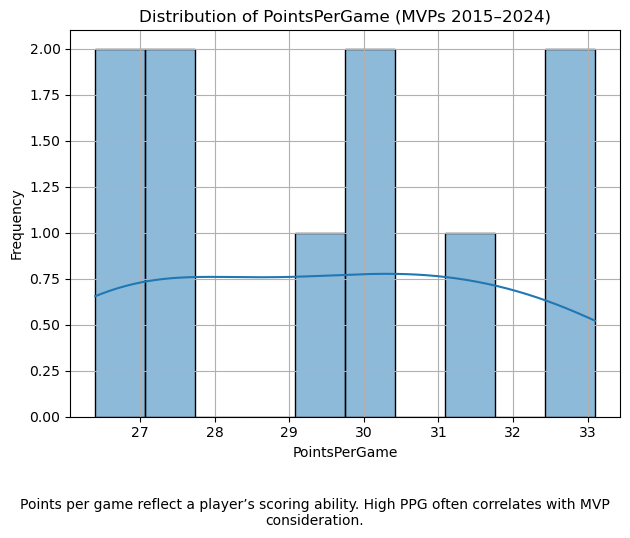

**Interpretation:** This histogram with a KDE (Kernel Density Estimation) line visualizes the distribution of MVPsscoring averages from 2015 to 2024. The shape of the KDE curve suggests a somewhat uniform distribution there is nostrong central peak, and MVPs are spread fairly evenly between 26 and 33 points per game. The KDE line does notform a classic bell curve, indicating no single dominant scoring archetype. Instead, it suggests that MVPs emergefrom a range of scoring profiles from efficient 26–27 PPG seasons to dominant high-volume scorers in the 32–33 PPGrange. This even spread reinforces that high PPG alone is not a strict MVP requirement. In recent years, votershave rewarded players for overall impact and efficiency, not just raw scoring numbers.

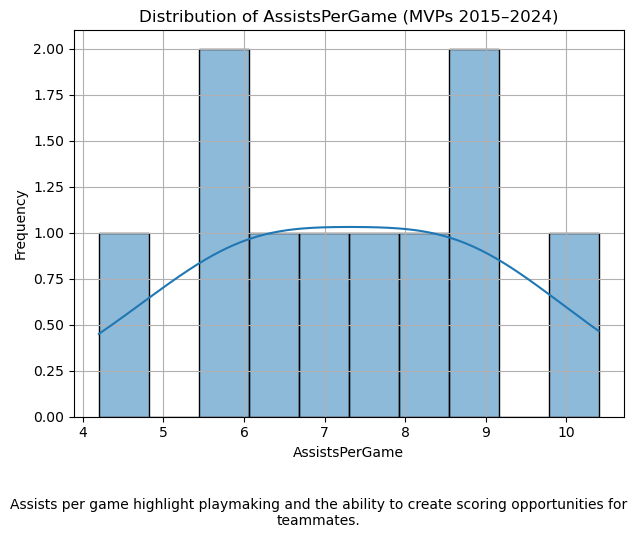

**Interpretation:** This histogram, overlaid with a KDE (Kernel Density Estimation) curve, displays how MVPs have variedin terms of playmaking over the past decade. The KDE curve exhibits a relatively flat, plateau-like shape, suggesting awide spread of assist profiles among MVPs rather than one dominant cluster. Values range broadly from just above 4per game to over 10 assists, indicating that MVP-caliber players can thrive as primary facilitators or as high-scoring focalpoints with secondary playmaking responsibilities. The near-uniform distribution implies that high assist numbers are not astrict MVP prerequisite. However, the spread also highlights that many MVPs in the modern era still contribute well aboveleague-average playmaking, reflecting a growing preference for versatile offensive engines.

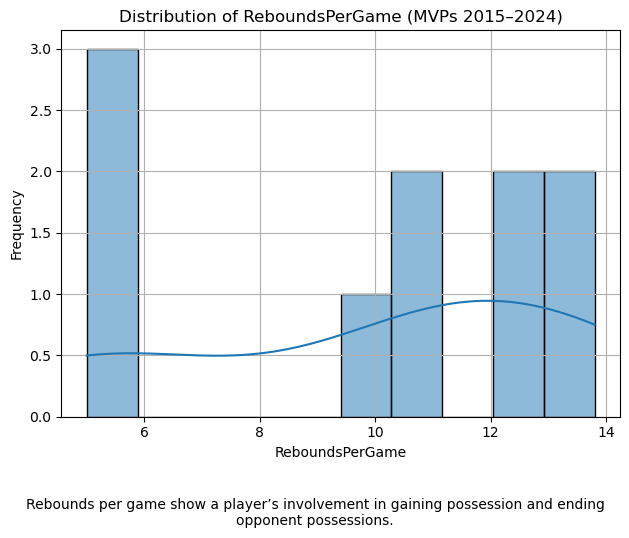

**Interpretation:** This histogram and KDE line show the rebound averages of MVPs across the past decade. The KDE curve revealsa bimodal-like distribution, with a visible concentration in the 12–13 RPG range and a separate small cluster around 5–6 RPG. Thissplit suggests two dominant MVP archetypes:- Interior-dominant bigs like Nikola Jokić or Giannis Antetokounmpo, who consistently average double-digit rebounds.- Versatile guards or wings who contribute in other areas but may not specialize in rebounding.The dip between modes implies that players averaging 7–9 RPG — often hybrids — are less common among MVPs, highlighting how MVP votersmay favor either dominant rebounders or high-efficiency scorers/playmakers, with less emphasis on “middle ground” profiles. Ultimately,this reinforces that while rebounding helps demonstrate impact, role context matters — and MVPs tend to either dominate the boards orinfluence the game in other high-leverage ways.

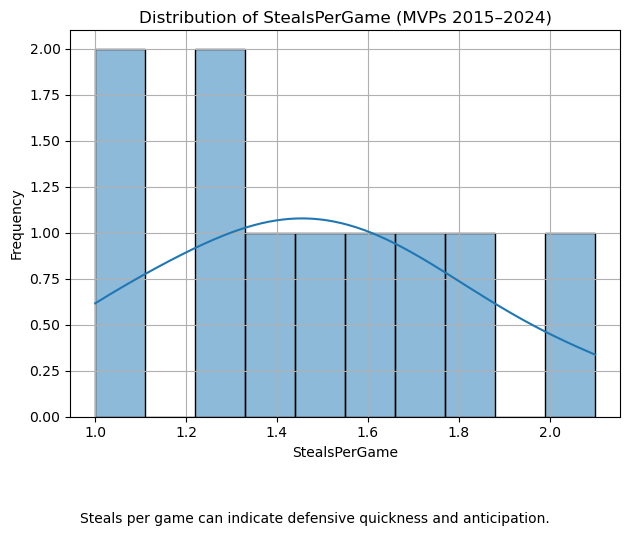

**Interpretation:** This histogram, overlaid with a KDE (Kernel Density Estimation) line, shows the distribution of MVPs’ steals per gamefrom 2015 to 2024. The curve leans slightly to the left, indicating a higher concentration of MVPs in the 1.2 to 1.9 SPG range, with a fewvalues dipping near or just above 1.0. Despite being a defensive metric, the relatively tight clustering implies that steals are not adifferentiating factor among MVP winners — most hover around a consistent range rather than exhibiting extreme outlier performances.Interestingly, the left skew suggests few MVPs have had low steal rates, reinforcing that MVP-caliber players are generally activedefenders. However, there is no sharp peak, which points to a broader truth: while defensive impact matters, elite steal numbers arenot what drives MVP selection.

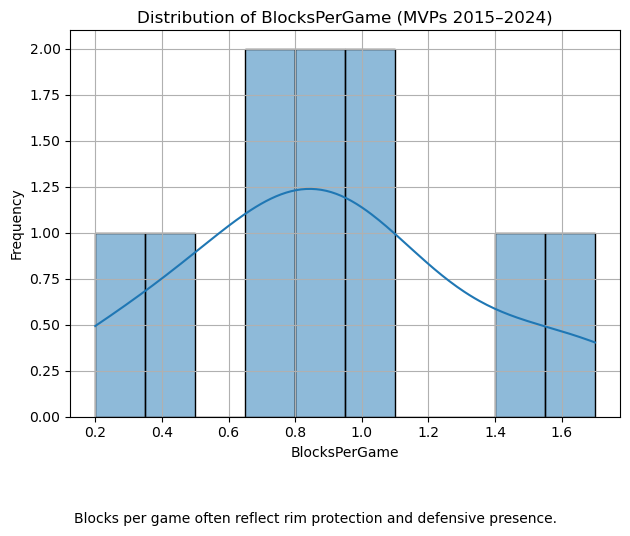

**Interpretation:** This histogram with KDE line displays the distribution of blocks per game among MVPs over the past decade. The shapeof the curve is relatively normal (bell-shaped) and centered around 0.8 to 1.0 BPG, indicating that most MVPs fall within a moderate rangeof shot-blocking. While the distribution is symmetric, it’s also fairly narrow. This suggests that rim protection is present but notextreme among MVP winners. MVPs are generally strong defenders, but rarely win the award purely on shot-blocking dominance a role moreoften attributed to traditional centers. Importantly, the lack of outliers above 2.0 BPG underscores a broader point: elite-levelblocking is not a prerequisite for MVP honors, especially in the modern era where offensive versatility and all-around impact carry moreweight in voting. This plot supports the ongoing shift toward balanced MVP profiles, where defense complements offensive excellence rather than defines it.

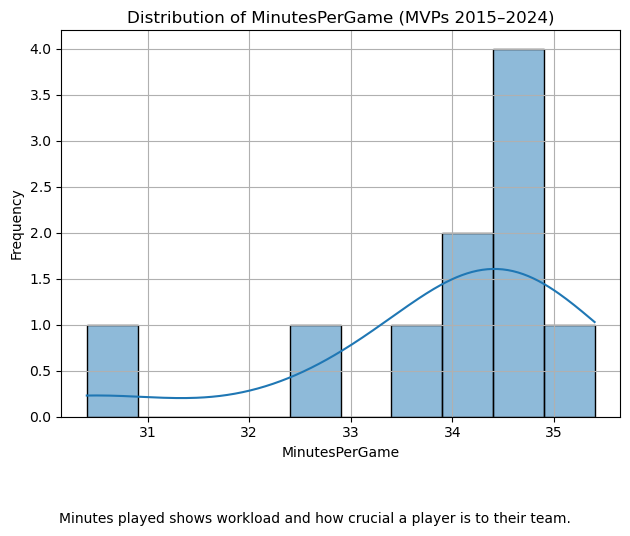

**Interpretation:** This histogram and KDE curve show the distribution of minutes played per game for MVPs from 2015 to 2024. The curve isright-skewed, with a clear concentration of values between approximately 33.5 and 35.5 minutes per game, and a notably high bar at the34.5 to 35 range. This pattern emphasizes that MVP-caliber players are not just productive—they are consistently relied upon. Coaches placed significant trust in these athletes, often turning to them in critical moments and sustained stretches of play. The absence of MVPs logging low minutes suggests a prevailing expectation in the modern NBA: to be considered “most valuable,” a player must maintain a significant on-court presence. At the same time, the fact that MVPs rarely exceed 36 minutes per game reflects the league’s growing focus on load management and player longevity. Overall, this distribution highlights a strategic balance. High-impact performance within a sustainable workload has become a defining characteristic of MVP-level play in today’s game.

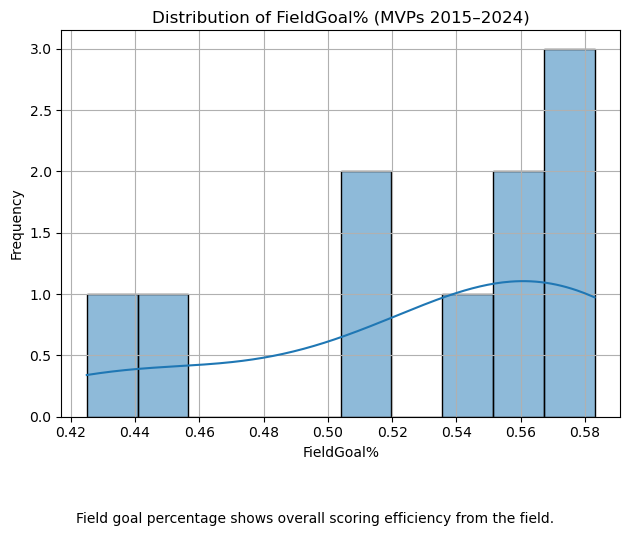

**Interpretation:** This histogram and KDE curve display the distribution of field goal percentages for MVPs from 2015 to 2024. The curve is right-skewed, with a strong cluster between 55% and 58%, and a sharp drop-off below 50%. The highest frequency bar occurs around the 57%–58% range, reflecting the prevalence of MVPs with elite shooting efficiency. This distribution underscores the NBA shift in valuingefficient scoring over sheer volume. Rather than rewarding players for high shot attempts, MVP selections increasingly favor those who maximize their opportunities and contribute with precision. This aligns with the league’s broader analytics movement, which prioritizes shot quality and conversion rates. The presence of a few MVPs below the 50% mark suggests room for diverse skillsets—guards or perimeter-heavy scorers may have lower FG% but still earn MVP honors due to all-around impact. Nonetheless, the overwhelming trend points to efficiency as a central trait among modern MVPs.

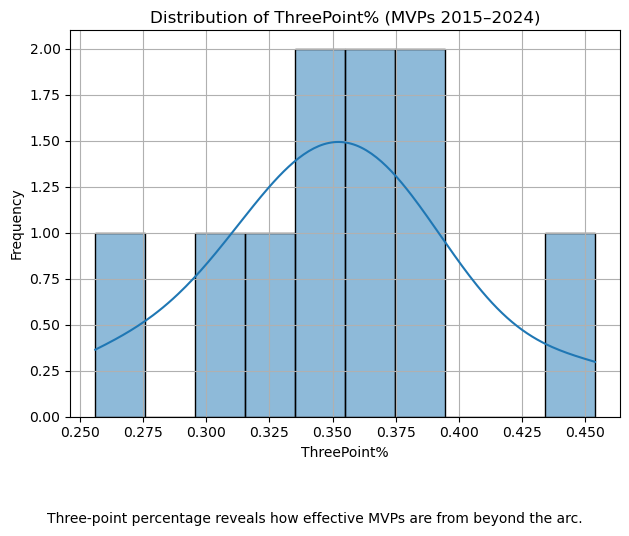

**Interpretation:** This histogram and KDE curve illustrate the distribution of MVPs’ three-point shooting efficiency from 2015 to 2024. The KDE forms a modest bell-shaped curve centered around 35% to 37%, with most values falling between 32% and 39%. This reflects league-average to slightly above-average shooting from beyond the arc. The shape of the distribution suggests that while being a great three-point shooter can strengthen an MVP case, it is not a strict requirement. There are outliers on both ends — with some MVPs below 30%, indicating minimal perimeter reliance, and others exceeding 40%, signaling elite range. This balance highlights a broader truth about MVP criteria in the modern NBA: versatility matters more than specialization. Three-point efficiency adds value, but voters continue to reward players who impact the game in multiple ways, even if their perimeter shooting is not their strongest attribute.

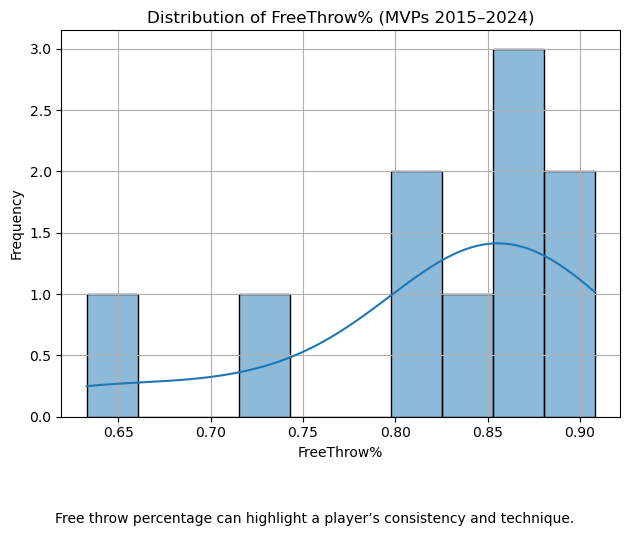

**Interpretation:** This histogram and KDE curve display the distribution of Free Throw Percentage (FT%) among MVPsfrom 2015 to 2024. The curve leans slightly to the right, with a notable cluster of MVPs falling between 80% and 90%,a range widely recognized as elite among scorers. The pattern highlights the importance of consistency at the free throw line.While free throws may not dominate box scores, they often occur in critical game moments where reliable scoring matters most. Most MVPs duringthis period excelled in these moments, reinforcing the value placed on precision and control. Although there are a few outliers in thelower range, particularly around 64% to 75%, these cases are uncommon. Players with below-average FT% typically made up for it throughdominant performances in other areas such as rebounding, efficiency, or playmaking. In today’s game, where drawing fouls and maximizingscoring opportunities is a central part of offensive strategy, strong free throw shooting serves as a marker of a complete offensive skillset. MVPs are expected not only to lead but to finish, and this trend underscores that free throw accuracy has become a key piece of whatdefines overall value on the court.

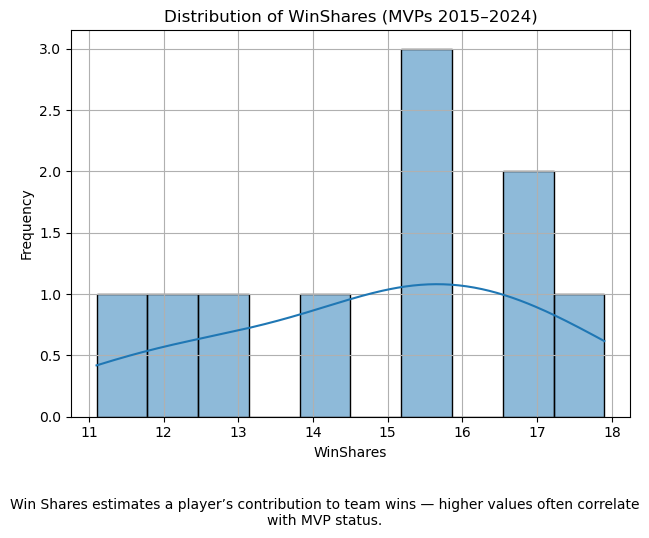

**Interpretation:** This histogram and KDE line visualize the distribution of MVPs Win Shares from 2015 to 2024, a metric that estimateshow much a player contributes to their team’s overall success. The distribution skews slightly to the right, with a strong concentration between 15 and 17 Win Shares. This clustering reflects a consistent pattern: MVPs are typically players whose impact directly translates to wins. In other words, they do not just post big stats their presence leads to victories. Most MVPs in this range come from teams withstrong regular-season records, often finishing near the top of the standings. The few cases below 14 Win Shares highlight that contextmatters. Sometimes, voters reward players whose leadership, versatility, or sheer importance to their team outweighs the raw win total.Still, high Win Shares remain one of the most consistent signals of MVP performance, reinforcing the NBAs tendency to value winning asa key part of individual greatness.

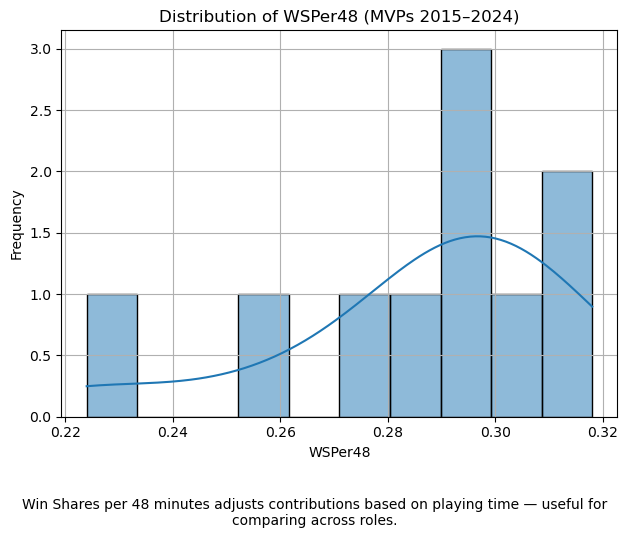

**Interpretation:** This histogram with a KDE (Kernel Density Estimation) curve illustrates the distribution of Win Shares per 48 minutes for MVPs between 2015 and 2024. The metric adjusts a player’s impact on team success relative to their playing time, offering a standardized lens to compare effectiveness across different usage levels. The distribution is right-skewed, with a clear concentration of MVPs in the 0.28 to 0.32 range — well above the league average, which typically hovers around 0.100. This clustering reflects the exceptional per-minute value that MVPs deliver, regardless of how many total minutes they play. In contrast to raw Win Shares, WSPer48 isolates efficiency from opportunity. Players who maintain elite productivity in limited minutes are not penalized, and those with heavier workloads must sustain their output. The data shows that MVP voters increasingly recognize high-efficiency contributors, not just high-usage players. This supports a modern shift in MVP criteria: value is no longer defined purely by cumulative totals, but by how much impact a player generates each time they step on the floor. The consistently high WSPer48 scores underline the role of analytics in shaping how value is measured and rewarded in today NBA.

In [24]:
# Define the stats to analyze
stats_to_plot = {
    'PointsPerGame': {
        'description':'Points per game reflect a player’s scoring ability. High PPG often correlates with MVP consideration.',
        'interpretation': 'This histogram with a KDE (Kernel Density Estimation) line visualizes the distribution of MVPs'
        'scoring averages from 2015 to 2024. The shape of the KDE curve suggests a somewhat uniform distribution there is no'
        'strong central peak, and MVPs are spread fairly evenly between 26 and 33 points per game. The KDE line does not'
        'form a classic bell curve, indicating no single dominant scoring archetype. Instead, it suggests that MVPs emerge'
        'from a range of scoring profiles from efficient 26–27 PPG seasons to dominant high-volume scorers in the 32–33 PPG'
        'range. This even spread reinforces that high PPG alone is not a strict MVP requirement. In recent years, voters'
        'have rewarded players for overall impact and efficiency, not just raw scoring numbers.'
    },

    'AssistsPerGame': {
        'description':'Assists per game highlight playmaking and the ability to create scoring opportunities for teammates.',
        'interpretation': 'This histogram, overlaid with a KDE (Kernel Density Estimation) curve, displays how MVPs have varied'
        'in terms of playmaking over the past decade. The KDE curve exhibits a relatively flat, plateau-like shape, suggesting a'
        'wide spread of assist profiles among MVPs rather than one dominant cluster. Values range broadly from just above 4'
        'per game to over 10 assists, indicating that MVP-caliber players can thrive as primary facilitators or as high-scoring focal'
        'points with secondary playmaking responsibilities. The near-uniform distribution implies that high assist numbers are not a'
        'strict MVP prerequisite. However, the spread also highlights that many MVPs in the modern era still contribute well above'
        'league-average playmaking, reflecting a growing preference for versatile offensive engines.'
    },
    
    'ReboundsPerGame': {
        'description': 'Rebounds per game show a player’s involvement in gaining possession and ending opponent possessions.',
        'interpretation': 'This histogram and KDE line show the rebound averages of MVPs across the past decade. The KDE curve reveals'
        'a bimodal-like distribution, with a visible concentration in the 12–13 RPG range and a separate small cluster around 5–6 RPG. This'
        'split suggests two dominant MVP archetypes:'
            '- Interior-dominant bigs like Nikola Jokić or Giannis Antetokounmpo, who consistently average double-digit rebounds.'
            '- Versatile guards or wings who contribute in other areas but may not specialize in rebounding.'
        'The dip between modes implies that players averaging 7–9 RPG — often hybrids — are less common among MVPs, highlighting how MVP voters'
        'may favor either dominant rebounders or high-efficiency scorers/playmakers, with less emphasis on “middle ground” profiles. Ultimately,'
        'this reinforces that while rebounding helps demonstrate impact, role context matters — and MVPs tend to either dominate the boards or'
        'influence the game in other high-leverage ways.'
    },
    
    'StealsPerGame': {
        'description': 'Steals per game can indicate defensive quickness and anticipation.',
        'interpretation': 'This histogram, overlaid with a KDE (Kernel Density Estimation) line, shows the distribution of MVPs’ steals per game'
        'from 2015 to 2024. The curve leans slightly to the left, indicating a higher concentration of MVPs in the 1.2 to 1.9 SPG range, with a few'
        'values dipping near or just above 1.0. Despite being a defensive metric, the relatively tight clustering implies that steals are not a'
        'differentiating factor among MVP winners — most hover around a consistent range rather than exhibiting extreme outlier performances.'
        'Interestingly, the left skew suggests few MVPs have had low steal rates, reinforcing that MVP-caliber players are generally active'
        'defenders. However, there is no sharp peak, which points to a broader truth: while defensive impact matters, elite steal numbers are'
        'not what drives MVP selection.'
    },
    
    'BlocksPerGame': {
        'description': 'Blocks per game often reflect rim protection and defensive presence.',
        'interpretation': 'This histogram with KDE line displays the distribution of blocks per game among MVPs over the past decade. The shape'
        'of the curve is relatively normal (bell-shaped) and centered around 0.8 to 1.0 BPG, indicating that most MVPs fall within a moderate range'
        'of shot-blocking. While the distribution is symmetric, it’s also fairly narrow. This suggests that rim protection is present but not'
        'extreme among MVP winners. MVPs are generally strong defenders, but rarely win the award purely on shot-blocking dominance a role more'
        'often attributed to traditional centers. Importantly, the lack of outliers above 2.0 BPG underscores a broader point: elite-level'
        'blocking is not a prerequisite for MVP honors, especially in the modern era where offensive versatility and all-around impact carry more'
        'weight in voting. This plot supports the ongoing shift toward balanced MVP profiles, where defense complements offensive excellence rather than defines it.'
    },
    
    'MinutesPerGame': {
        'description':'Minutes played shows workload and how crucial a player is to their team.',
        'interpretation': 'This histogram and KDE curve show the distribution of minutes played per game for MVPs from 2015 to 2024. The curve is'
        'right-skewed, with a clear concentration of values between approximately 33.5 and 35.5 minutes per game, and a notably high bar at the'
        '34.5 to 35 range. This pattern emphasizes that MVP-caliber players are not just productive—they are consistently relied upon. Coaches '
        'placed significant trust in these athletes, often turning to them in critical moments and sustained stretches of play. The absence of '
        'MVPs logging low minutes suggests a prevailing expectation in the modern NBA: to be considered “most valuable,” a player must maintain '
        'a significant on-court presence. At the same time, the fact that MVPs rarely exceed 36 minutes per game reflects the league’s growing '
        'focus on load management and player longevity. Overall, this distribution highlights a strategic balance. High-impact performance within '
        'a sustainable workload has become a defining characteristic of MVP-level play in today’s game.'
    },
    
    'FieldGoal%':  {
        'description':'Field goal percentage shows overall scoring efficiency from the field.',
        'interpretation': 'This histogram and KDE curve display the distribution of field goal percentages for MVPs from 2015 to 2024. The curve is '
        'right-skewed, with a strong cluster between 55% and 58%, and a sharp drop-off below 50%. The highest frequency bar occurs around the '
        '57%–58% range, reflecting the prevalence of MVPs with elite shooting efficiency. This distribution underscores the NBA shift in valuing' 
        'efficient scoring over sheer volume. Rather than rewarding players for high shot attempts, MVP selections increasingly favor those who '
        'maximize their opportunities and contribute with precision. This aligns with the league’s broader analytics movement, which prioritizes '
        'shot quality and conversion rates. The presence of a few MVPs below the 50% mark suggests room for diverse skillsets—guards or '
        'perimeter-heavy scorers may have lower FG% but still earn MVP honors due to all-around impact. Nonetheless, the overwhelming trend '
        'points to efficiency as a central trait among modern MVPs.'
    },
    
    'ThreePoint%': {
        'description': 'Three-point percentage reveals how effective MVPs are from beyond the arc.',
        'interpretation': 'This histogram and KDE curve illustrate the distribution of MVPs’ three-point shooting efficiency from 2015 to 2024. '
        'The KDE forms a modest bell-shaped curve centered around 35% to 37%, with most values falling between 32% and 39%. This reflects '
        'league-average to slightly above-average shooting from beyond the arc. The shape of the distribution suggests that while being a '
        'great three-point shooter can strengthen an MVP case, it is not a strict requirement. There are outliers on both ends — with some MVPs '
        'below 30%, indicating minimal perimeter reliance, and others exceeding 40%, signaling elite range. This balance highlights a broader '
        'truth about MVP criteria in the modern NBA: versatility matters more than specialization. Three-point efficiency adds value, but voters '
        'continue to reward players who impact the game in multiple ways, even if their perimeter shooting is not their strongest attribute.'
    },
    
    'FreeThrow%': {
        'description': 'Free throw percentage can highlight a player’s consistency and technique.',
        'interpretation': 'This histogram and KDE curve display the distribution of Free Throw Percentage (FT%) among MVPs'
        'from 2015 to 2024. The curve leans slightly to the right, with a notable cluster of MVPs falling between 80% and 90%,'
        'a range widely recognized as elite among scorers. The pattern highlights the importance of consistency at the free throw line.' 
        'While free throws may not dominate box scores, they often occur in critical game moments where reliable scoring matters most. Most MVPs during'
        'this period excelled in these moments, reinforcing the value placed on precision and control. Although there are a few outliers in the'
        'lower range, particularly around 64% to 75%, these cases are uncommon. Players with below-average FT% typically made up for it through'
        'dominant performances in other areas such as rebounding, efficiency, or playmaking. In today’s game, where drawing fouls and maximizing'
        'scoring opportunities is a central part of offensive strategy, strong free throw shooting serves as a marker of a complete offensive skill'
        'set. MVPs are expected not only to lead but to finish, and this trend underscores that free throw accuracy has become a key piece of what'
        'defines overall value on the court.'
    },
    
    'WinShares': {
        'description': 'Win Shares estimates a player’s contribution to team wins — higher values often correlate with MVP status.',
        'interpretation': 'This histogram and KDE line visualize the distribution of MVPs Win Shares from 2015 to 2024, a metric that estimates'
        'how much a player contributes to their team’s overall success. The distribution skews slightly to the right, with a strong concentration '
        'between 15 and 17 Win Shares. This clustering reflects a consistent pattern: MVPs are typically players whose impact directly translates '
        'to wins. In other words, they do not just post big stats their presence leads to victories. Most MVPs in this range come from teams with'
        'strong regular-season records, often finishing near the top of the standings. The few cases below 14 Win Shares highlight that context' 
        'matters. Sometimes, voters reward players whose leadership, versatility, or sheer importance to their team outweighs the raw win total.'
        'Still, high Win Shares remain one of the most consistent signals of MVP performance, reinforcing the NBAs tendency to value winning as'
        'a key part of individual greatness.'
    },
    
    'WSPer48': {
        'description': 'Win Shares per 48 minutes adjusts contributions based on playing time — useful for comparing across roles.',
        'interpretation': 'This histogram with a KDE (Kernel Density Estimation) curve illustrates the distribution of Win Shares per 48 minutes '
        'for MVPs between 2015 and 2024. The metric adjusts a player’s impact on team success relative to their playing time, offering a '
        'standardized lens to compare effectiveness across different usage levels. The distribution is right-skewed, with a clear concentration of '
        'MVPs in the 0.28 to 0.32 range — well above the league average, which typically hovers around 0.100. This clustering reflects the '
        'exceptional per-minute value that MVPs deliver, regardless of how many total minutes they play. In contrast to raw Win Shares, WSPer48 '
        'isolates efficiency from opportunity. Players who maintain elite productivity in limited minutes are not penalized, and those with '
        'heavier workloads must sustain their output. The data shows that MVP voters increasingly recognize high-efficiency contributors, not just '
        'high-usage players. This supports a modern shift in MVP criteria: value is no longer defined purely by cumulative totals, but by how much '
        'impact a player generates each time they step on the floor. The consistently high WSPer48 scores underline the role of analytics in '
        'shaping how value is measured and rewarded in today NBA.'
    },
}

# Loop through each stat
for stat, content in stats_to_plot.items():
    # Plotting the distribution of each stat
    sns.histplot(mvp_df[stat], bins=10, kde=True)
    plt.title(f'Distribution of {stat} (MVPs 2015–2024)')
    plt.xlabel(stat)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.figtext(0.5, -0.1, content['description'], wrap=True, horizontalalignment='center', fontsize=10)
    plt.tight_layout()
    plt.show()

# Print interpretation below plot (in Markdown, you'd use this as a cell)
    display(Markdown(f"**Interpretation:** {content['interpretation']}"))

**Section Summary: What the Distributions Reveal About MVP Profiles (2015–2024)**

The individual histograms and KDE curves offer a deeper look into the statistical profiles of MVP winners over the past decade. While each stat tells a unique story, several broader patterns emerge across all metrics:

- Consistency in High-Level Output: Most MVPs consistently delivered strong numbers across core categories. Whether in scoring, assists, or rebounding, there were clear thresholds MVPs rarely fell below certain statistical benchmarks.

- Balance Over Extremes: The distributions do not suggest that MVPs are outliers in any single category. Instead, they cluster toward the high end of multiple metrics, showing that well-rounded excellence is often more rewarded than extreme dominance in one area.

- Offensive Efficiency as a Defining Trait: High field goal percentage and free throw percentage were common across MVPs. This reflects a shift in MVP value from sheer volume to efficient productivity.

- Playmaking & Versatility Matter: A wide range in assists and rebounds suggests that different types of MVPs can emerge from scoring forwards to all-around centers and hybrid playmakers. Voters are rewarding diverse skill sets that contribute to team success in different ways.

- Moderate Emphasis on Defensive Stats: While blocks and steals were considered, their distributions were more spread out. MVPs may be expected to contribute defensively, but elite defense alone is not the deciding factor.

Together, these patterns suggest that today’s MVPs are expected to be multi-dimensional contributors, capable of impacting games beyond traditional scoring and doing so with a high level of efficiency and consistency.

With the distribution of MVP stats established, the focus now shifts to how those same metrics have changed over time. This section analyzes year-over-year trends across offensive, defensive, and efficiency categories from 2015 to 2024.

Tracking these patterns reveals how the profile of the league’s most valuable players has adapted to modern NBA playstyles. Whether through increased scoring volume, enhanced versatility, or greater shooting efficiency, these trends reflect evolving expectations and strategic shifts across the league.

Each line graph represents a key facet of performance, highlighting the trajectory of MVP-level production across a pivotal decade in NBA history.

**3.1 Offensive Trends Over Time**

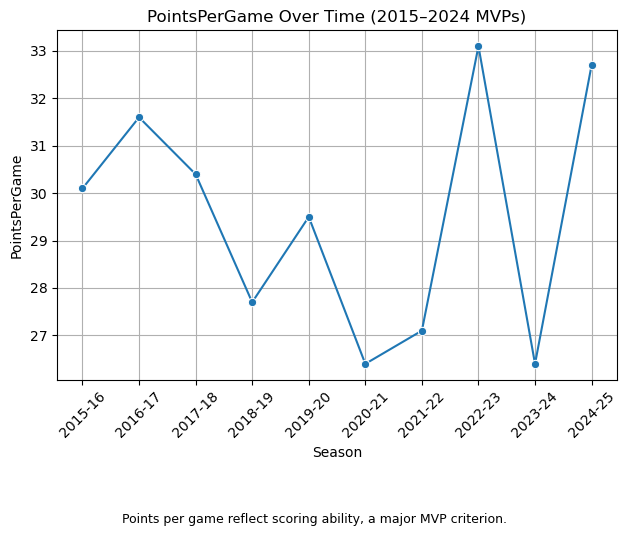

**Interpretation:** This line graph tracks the scoring averages of NBA MVPs over a 10-season span, from the 2015–16 to 2024–25 seasons.It highlights how offensive volume — specifically, points per game — has fluctuated across MVP winners.Early Peak (2016–17): A notable early spike occurred in the 2016–17 season, with an MVP averaging over 31 PPG, reflective of the era’sscoring explosion post-2015. This season followed a league-wide pace increase and the rise of the 3-point-heavy offense.During Pandemic Era (2019–2021): There’s a clear decline in scoring during the 2019–20 and 2020–21 seasons, possibly tied to disruptions from the COVID-19 pandemic. MVPs during this stretch leaned more into all-around efficiency than raw scoring.Massive Spike (2022–23): The highest point in the graph is in 2022–23, when the MVP averaged 33.1 PPG, reflecting a return to favoring dominant scorers. This aligns with a broader league trend where offensive numbers reached historic highs.- Recent Bounce Back (2024–25): After a brief dip in 2023–24, the 2024–25 MVP again averaged over 32 PPG, suggesting sustained value placed on elite scoring in MVP voting. This up-and-down pattern reinforces that while high scoring is often celebrated, it is not a strict requirement for MVP status. MVPsduring lower-scoring seasons likely stood out due to their all-around impact, team success, or efficiency. However, the recent return tohigh PPG figures suggests that dominant scorers continue to drive MVP narratives — especially when paired with winning records and eye-catchinghighlight reels.

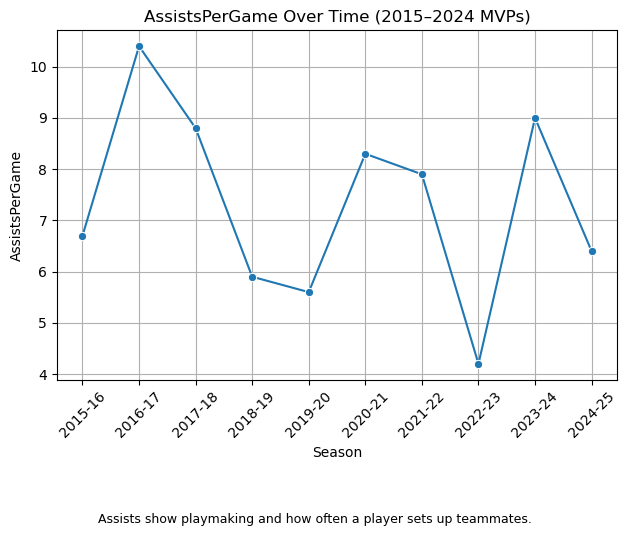

**Interpretation:** This graph highlights how playmaking has varied among MVPs over the last decade, offering insight into the evolvingvalue of distributing the ball and facilitating offense. Peak Playmaking (2016–17): The 10.4 APG mark stands out as the high point for MVPassist production, signaling the recognition of primary facilitators during this era.Steady Decline, Then Recovery: After 2017–18, APG trended downward, bottoming out in 2022–23 with just 4.2 APG the lowest in the periodbefore rebounding to 9.0 in 2023–24.Recent Volatility: The sharp swings in recent seasons reflect shifting MVP archetypes — from pure scorers to versatile playmakersdepending on the league narrative and team success.High assist numbers are not a consistent requirement for MVP selection, but standout passing seasons still make a strong case. Playerswith lower assist totals likely excelled in scoring efficiency, rebounding, or defense — compensating for their limited playmaking role.The fluctuation underscores that MVP candidacy is often about overall impact, with assists being one of several lenses through which thatimpact is viewed.

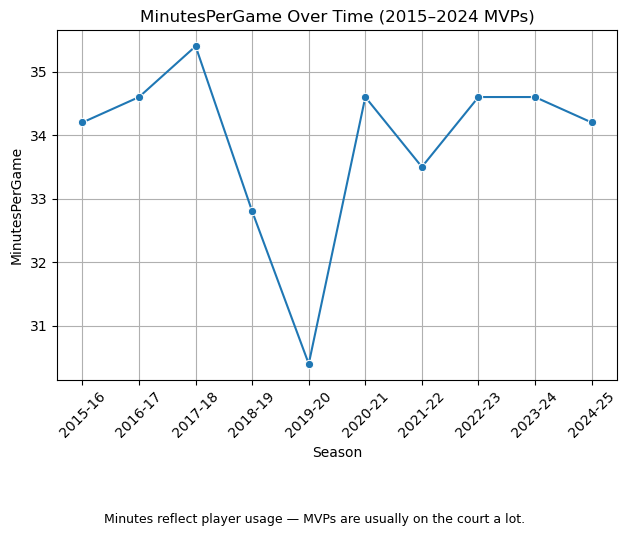

**Interpretation:** This line graph showcases the playing time workload MVPs have taken on over the past ten seasons, highlighting howavailability and usage factor into MVP recognition.Stable High Usage: Most MVPs played between 34 and 35.5 minutes per game, with relatively small fluctuations across the decade.Notable Drop in 2019–20: The lowest point, around 30.4 MPG, marks a potential shift in how the league values per-minute efficiency or mayreflect broader team depth and rest management.Post-2020 Rebound: Playing time quickly returned to pre-2020 levels, indicating that the dip may have been an outlier tied to unique teamstrategies or season disruptions.These trends reinforce that MVPs are consistently leaned on to play significant minutes a signal of both durability and centrality totheir team’s system. While load management and team depth have grown in importance league-wide, MVPs still log heavy minutes, particularlywhen their teams contend for top playoff positioning. The lack of outliers above 36 MPG also hints at a shift in coaching philosophy: it isless about exhausting stars and more about maximizing production in controlled spurts.

In [48]:
# Define offense-related stats and descriptions
offense_stats = {
    'PointsPerGame':{
        'description': 'Points per game reflect scoring ability, a major MVP criterion.',
        'interpretation': 'This line graph tracks the scoring averages of NBA MVPs over a 10-season span, from the 2015–16 to 2024–25 seasons.'
        'It highlights how offensive volume — specifically, points per game — has fluctuated across MVP winners.'

        'Early Peak (2016–17): A notable early spike occurred in the 2016–17 season, with an MVP averaging over 31 PPG, reflective of the era’s'
        'scoring explosion post-2015. This season followed a league-wide pace increase and the rise of the 3-point-heavy offense.'

        'During Pandemic Era (2019–2021): There’s a clear decline in scoring during the 2019–20 and 2020–21 seasons, possibly tied to disruptions '
        'from the COVID-19 pandemic. MVPs during this stretch leaned more into all-around efficiency than raw scoring.'

        'Massive Spike (2022–23): The highest point in the graph is in 2022–23, when the MVP averaged 33.1 PPG, reflecting a return to favoring '
        'dominant scorers. This aligns with a broader league trend where offensive numbers reached historic highs.'
        '- Recent Bounce Back (2024–25): After a brief dip in 2023–24, the 2024–25 MVP again averaged over 32 PPG, suggesting sustained value '
        'placed on elite scoring in MVP voting.'

        ' This up-and-down pattern reinforces that while high scoring is often celebrated, it is not a strict requirement for MVP status. MVPs' 
        'during lower-scoring seasons likely stood out due to their all-around impact, team success, or efficiency. However, the recent return to'
        'high PPG figures suggests that dominant scorers continue to drive MVP narratives — especially when paired with winning records and eye-catching'
        'highlight reels.'
    },

    'AssistsPerGame': {
        'description': 'Assists show playmaking and how often a player sets up teammates.',
        'interpretation': 'This graph highlights how playmaking has varied among MVPs over the last decade, offering insight into the evolving'
        'value of distributing the ball and facilitating offense. Peak Playmaking (2016–17): The 10.4 APG mark stands out as the high point for MVP'
        'assist production, signaling the recognition of primary facilitators during this era.'

        'Steady Decline, Then Recovery: After 2017–18, APG trended downward, bottoming out in 2022–23 with just 4.2 APG the lowest in the period' 
        'before rebounding to 9.0 in 2023–24.'

        'Recent Volatility: The sharp swings in recent seasons reflect shifting MVP archetypes — from pure scorers to versatile playmakers'
        'depending on the league narrative and team success.'

        'High assist numbers are not a consistent requirement for MVP selection, but standout passing seasons still make a strong case. Players' 
        'with lower assist totals likely excelled in scoring efficiency, rebounding, or defense — compensating for their limited playmaking role.'
        'The fluctuation underscores that MVP candidacy is often about overall impact, with assists being one of several lenses through which that' 
        'impact is viewed.'
},
    'MinutesPerGame':{
        'description': 'Minutes reflect player usage — MVPs are usually on the court a lot.',
        'interpretation': 'This line graph showcases the playing time workload MVPs have taken on over the past ten seasons, highlighting how'
        'availability and usage factor into MVP recognition.'

        'Stable High Usage: Most MVPs played between 34 and 35.5 minutes per game, with relatively small fluctuations across the decade.'

        'Notable Drop in 2019–20: The lowest point, around 30.4 MPG, marks a potential shift in how the league values per-minute efficiency or may'
        'reflect broader team depth and rest management.'

        'Post-2020 Rebound: Playing time quickly returned to pre-2020 levels, indicating that the dip may have been an outlier tied to unique team'
        'strategies or season disruptions.'

        'These trends reinforce that MVPs are consistently leaned on to play significant minutes a signal of both durability and centrality to'
        'their team’s system. While load management and team depth have grown in importance league-wide, MVPs still log heavy minutes, particularly'
        'when their teams contend for top playoff positioning. The lack of outliers above 36 MPG also hints at a shift in coaching philosophy: it is'
        'less about exhausting stars and more about maximizing production in controlled spurts.'
    },
}

# Ensure numeric conversion for offense stats
# Convert the relevant columns to numeric, forcing errors to NaN
mvp_df[list(offense_stats.keys())] = mvp_df[list(offense_stats.keys())].apply(pd.to_numeric, errors='coerce')

# Plot each stat separately
for stat, content in offense_stats.items():
    sns.lineplot(data=mvp_df, x='Season', y=stat, marker='o')
    plt.title(f"{stat} Over Time (2015–2024 MVPs)")
    plt.xlabel("Season")
    plt.ylabel(stat)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.figtext(0.5, -0.1, content['description'], wrap=True, horizontalalignment ='center', fontsize=9)
    plt.tight_layout()
    plt.show()

# Print interpretation below plot (in Markdown, you'd use this as a cell)
    display(Markdown(f"**Interpretation:** {content['interpretation']}"))


**Offensive Trends Summary (2015–2024 MVPs)**

A review of offensive metrics across the last decade reveals several evolving dynamics:

- Points per game continue to reflect a wide range of MVP profiles, with peaks above 33 PPG and valleys closer to 26. This fluctuation highlights how scoring dominance is sometimes rewarded, but not required, as voters have also recognized well-rounded impact.

- Assists per game show sharp shifts, signaling that playmaking has become a more celebrated component in MVP conversations. Some seasons featured MVPs nearing 10 APG, reinforcing the growing value of offensive orchestration.

- Minutes per game remain remarkably stable, typically between 34 and 35.5 MPG. This consistency reflects how MVPs are trusted to carry significant workloads, but teams also manage minutes carefully to avoid overuse.


There’s no single path to MVP on the offensive end. Whether through prolific scoring, elite distribution, or sustained availability, MVPs shape their value in different ways. What’s clear is that offensive versatility not just volume has become a defining feature of modern MVP seasons.

**3.2 Defensive Trends Over Time**

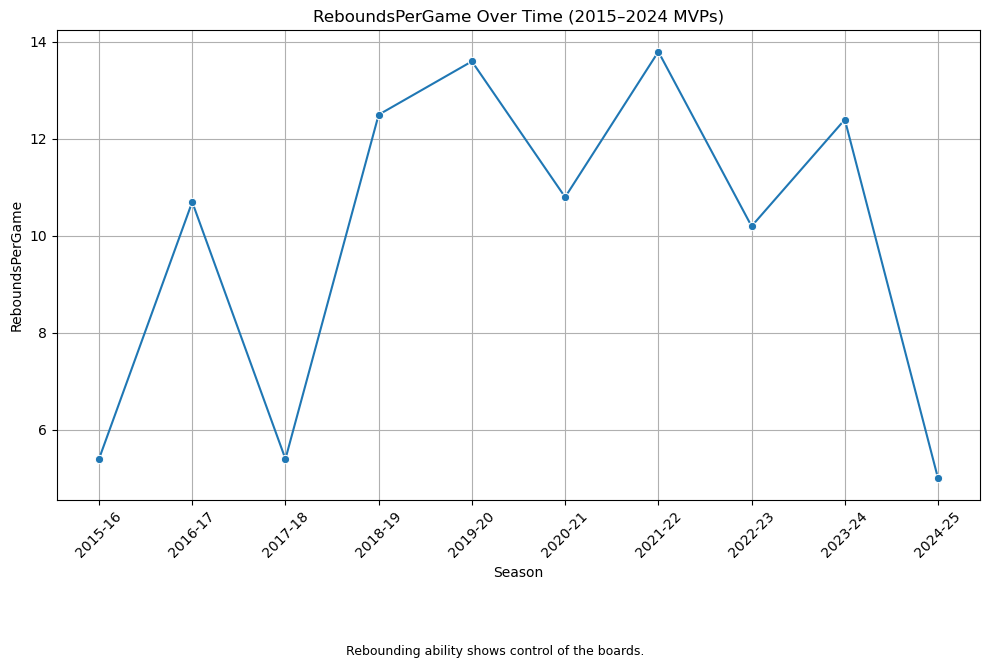

**Interpretation:** This line graph highlights how MVPs have contributed in the rebounding department, a key metric of defensive activityand effort in securing possessions.Dramatic Swings: The data shows major fluctuations year to year, with a peak near 13.8 RPG in 2021–22 and lows under 6 RPG in 2015–16 and2024–25.Big Man Dominance: Between 2018–2023, MVPs consistently posted double-digit rebounds, highlighting a stretch where frontcourt playersoften centers or power forwards had a strong hold on the award.Recent Drop: The steep decline in 2024–25 suggests a possible return to guard or wing dominance, where rebounding isn’t a primary role.This pattern reflects how MVP criteria have varied by era. The stretch from 2018–2023 coincides with players like Nikola Jokić and GiannisAntetokounmpo, who led their teams with size, positioning, and activity near the rim. The more recent dip may indicate a strategic shiftin voter preference, where rebounding is valuable, but not essential, especially if a player impacts the game through scoring, playmaking,or defensive versatility elsewhere. It also hints at role flexibility, as elite rebounding numbers are not always required if the MVPcontributes significantly in other areas of the floor.

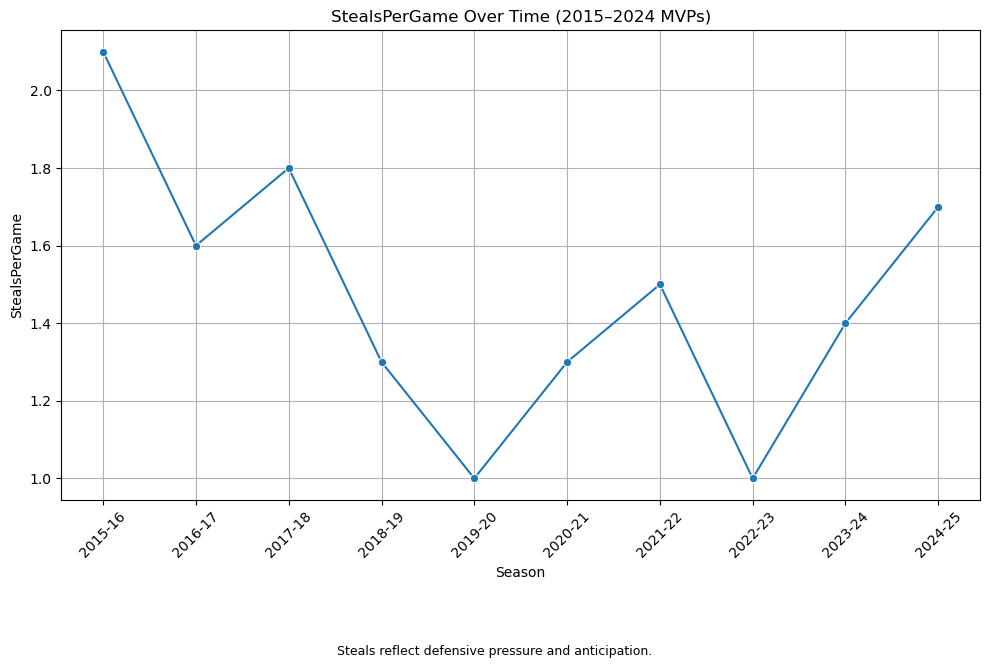

**Interpretation:** This line graph captures how MVPs have performed in terms of steals a direct indicator of defensive pressure,anticipation, and ability to force turnovers in passing lanes.Early Peak, Gradual Decline: The highest steal rate appeared in 2015–16 with over 2.0 SPG, followed by a general downward trend in theyears that followed.Recent Recovery: After a sharp drop in 2022–23 (1.0 SPG), there’s a slight rebound in the two most recent seasons, climbing to about 1.7SPG in 2024–25.Range Stability: Despite variation, the SPG numbers largely stay within a narrow band (1.0–1.8), suggesting that elite steal numbers aren’ta consistent hallmark of MVP selections.This trend implies that while steals contribute to a player’s MVP resume, they aren’t a primary driver of MVP outcomes in modern seasons.The early spike might be attributed to MVPs who doubled as lockdown defenders or played in aggressive defensive systems. However, recentMVPs may be excelling in team-based defensive schemes or contributing in other areas like rim protection or playmaking limiting theiropportunity to gamble for steals. The uptick at the end hints at a renewed appreciation for perimeter defenders who generate live-ballturnovers without compromising team defense.

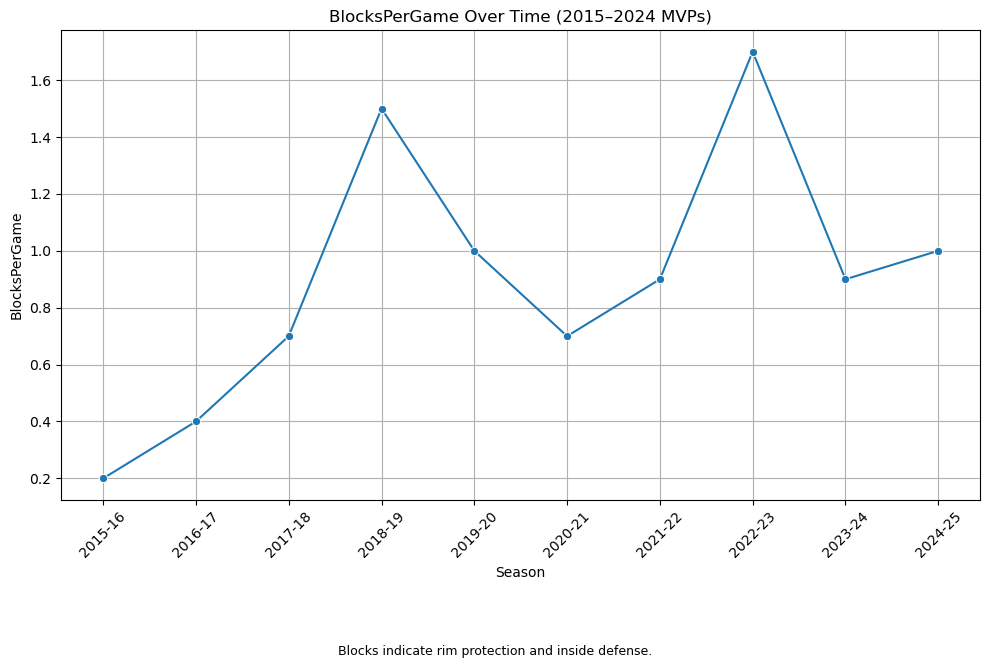

**Interpretation:** This line graph tracks how MVPs have contributed in terms of blocks a key metric for rim protection and overalldefensive presence near the basket.Steady Rise to Mid-Decade Peak: From 2015–16’s low of 0.2 BPG, there’s a clear upward climb to a peak in 2018–19 at 1.5 BPG, signaling astretch where paint protection gained emphasis in MVP profiles.Volatility in Later Years: After 2019–20, block numbers fluctuated more significantly, with a secondary peak in 2022–23 (1.7 BPG) beforedropping again.Consistent Floor Presence: Even at the lower end, MVPs are contributing at least 0.7–1.0 BPG in most seasons since 2020, suggesting abaseline expectation for rim defense.The rise through the late 2010s aligns with a period where big men began reasserting themselves in MVP conversations not just as scorersbut as two-way players. The peaks in 2018–19 and 2022–23 likely reflect MVPs who played a significant role defending the paint and altering shots near the rim. While blocks are important, today’s MVPs also influence defense through switching, mobility, and positioning especially those not stationed in the paint. The trend underscores the diversity in MVP roles: some anchor defenses near the rim, while others contribute through pressure and coverage on the perimeter.

In [52]:
# Define defense-related stats and descriptions
defense_stats = {
    'ReboundsPerGame':{
        'description': 'Rebounding ability shows control of the boards.',
        'interpretation': 'This line graph highlights how MVPs have contributed in the rebounding department, a key metric of defensive activity'
        'and effort in securing possessions.'

        'Dramatic Swings: The data shows major fluctuations year to year, with a peak near 13.8 RPG in 2021–22 and lows under 6 RPG in 2015–16 and' 
        '2024–25.'

        'Big Man Dominance: Between 2018–2023, MVPs consistently posted double-digit rebounds, highlighting a stretch where frontcourt players'
        'often centers or power forwards had a strong hold on the award.'

        'Recent Drop: The steep decline in 2024–25 suggests a possible return to guard or wing dominance, where rebounding isn’t a primary role.'

        'This pattern reflects how MVP criteria have varied by era. The stretch from 2018–2023 coincides with players like Nikola Jokić and Giannis' 
        'Antetokounmpo, who led their teams with size, positioning, and activity near the rim. The more recent dip may indicate a strategic shift'
        'in voter preference, where rebounding is valuable, but not essential, especially if a player impacts the game through scoring, playmaking,'
        'or defensive versatility elsewhere. It also hints at role flexibility, as elite rebounding numbers are not always required if the MVP'
        'contributes significantly in other areas of the floor.'
    },

    'StealsPerGame': {
        'description': 'Steals reflect defensive pressure and anticipation.',
        'interpretation': 'This line graph captures how MVPs have performed in terms of steals a direct indicator of defensive pressure,' 
        'anticipation, and ability to force turnovers in passing lanes.'

        'Early Peak, Gradual Decline: The highest steal rate appeared in 2015–16 with over 2.0 SPG, followed by a general downward trend in the'
        'years that followed.'

        'Recent Recovery: After a sharp drop in 2022–23 (1.0 SPG), there’s a slight rebound in the two most recent seasons, climbing to about 1.7'
        'SPG in 2024–25.'

        'Range Stability: Despite variation, the SPG numbers largely stay within a narrow band (1.0–1.8), suggesting that elite steal numbers aren’t' 
        'a consistent hallmark of MVP selections.'

        'This trend implies that while steals contribute to a player’s MVP resume, they aren’t a primary driver of MVP outcomes in modern seasons.'
        'The early spike might be attributed to MVPs who doubled as lockdown defenders or played in aggressive defensive systems. However, recent' 
        'MVPs may be excelling in team-based defensive schemes or contributing in other areas like rim protection or playmaking limiting their'
        'opportunity to gamble for steals. The uptick at the end hints at a renewed appreciation for perimeter defenders who generate live-ball' 
        'turnovers without compromising team defense.'
    },

    'BlocksPerGame': {
        'description': 'Blocks indicate rim protection and inside defense.',
        'interpretation': 'This line graph tracks how MVPs have contributed in terms of blocks a key metric for rim protection and overall'
        'defensive presence near the basket.'

        'Steady Rise to Mid-Decade Peak: From 2015–16’s low of 0.2 BPG, there’s a clear upward climb to a peak in 2018–19 at 1.5 BPG, signaling a' 
        'stretch where paint protection gained emphasis in MVP profiles.'

        'Volatility in Later Years: After 2019–20, block numbers fluctuated more significantly, with a secondary peak in 2022–23 (1.7 BPG) before'
        'dropping again.'

        'Consistent Floor Presence: Even at the lower end, MVPs are contributing at least 0.7–1.0 BPG in most seasons since 2020, suggesting a'
        'baseline expectation for rim defense.'

        'The rise through the late 2010s aligns with a period where big men began reasserting themselves in MVP conversations not just as scorers'
        'but as two-way players. The peaks in 2018–19 and 2022–23 likely reflect MVPs who played a significant role defending the paint and '
        'altering shots near the rim. While blocks are important, today’s MVPs also influence defense through switching, mobility, and positioning '
        'especially those not stationed in the paint. The trend underscores the diversity in MVP roles: some anchor defenses near the rim, while '
        'others contribute through pressure and coverage on the perimeter.'
    },

}

# Ensure numeric
mvp_df[list(defense_stats.keys())] = mvp_df[list(defense_stats.keys())].apply(pd.to_numeric, errors='coerce')

# Plot each stat separately
for stat, content in defense_stats.items():
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=mvp_df, x='Season', y=stat, marker='o')
    plt.title(f"{stat} Over Time (2015–2024 MVPs)")
    plt.xlabel("Season")
    plt.ylabel(stat)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.figtext(0.5, -0.1, content['description'], wrap=True, ha='center', fontsize=9)
    plt.tight_layout()
    plt.show()

# Print interpretation below plot (in Markdown, you'd use this as a cell)
    display(Markdown(f"**Interpretation:** {content['interpretation']}"))



**Defensive Trends Summary (2015–2024 MVPs)**

Looking across the defensive trends - rebounds, steals, and blocks — a few clear patterns emerge:

- Rebounds per game show the most variation, with MVPs ranging from lower averages near 5 RPG to elite performances in the double digits. This highlights the diversity of MVP profiles, from dominant big men to versatile forwards and guards.

- Steals per game remained relatively consistent, generally falling between 1.0 and 1.8 SPG. While these numbers are not exceptionally high, they reflect MVPs who are disruptive and aware on the defensive end, even if they are not exclusively known for defense.

- Blocks per game display a moderate increase in recent years, rising from earlier lows to peaks around 1.5 to 1.7 BPG. This trend suggests growing value placed on rim protection among MVP candidates, though block totals still vary depending on player role and position.

There is no singular defensive blueprint for an MVP. Some dominate physically in the paint, while others make an impact through timing, agility, or versatility. What remains consistent is that MVPs bring meaningful defensive value—whether through rebounding, interior defense, or creating turnovers.

**3.3 Efficiency Trends Over Time**

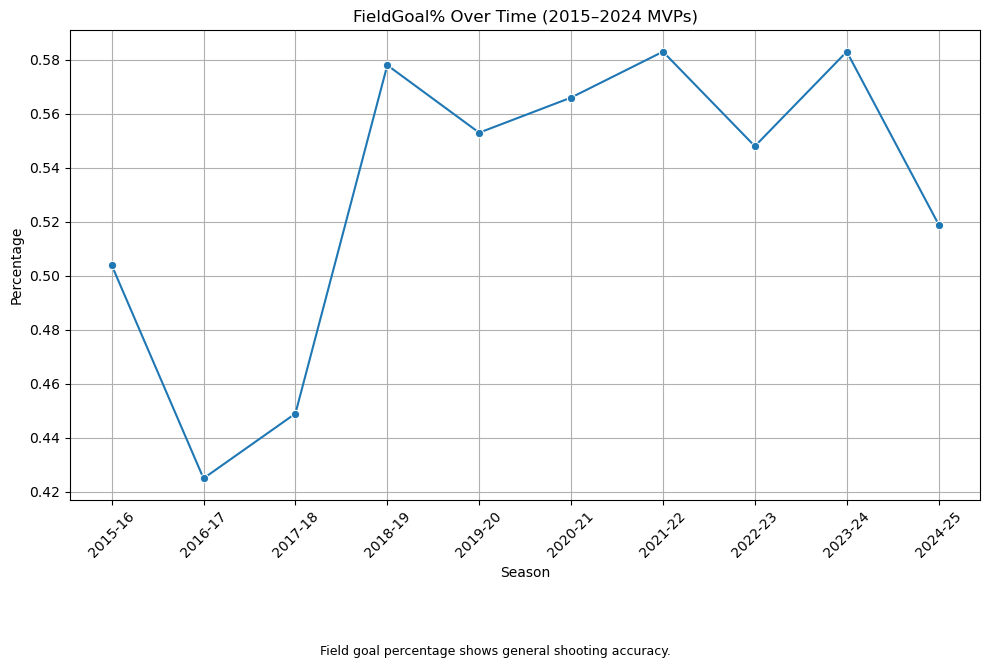

**Interpretation:** This line graph shows how MVP-level shooting efficiency has evolved across the last decade. The data reflects noticeableshifts, with a significant climb in field goal percentage beginning around the 2018–19 season and sustaining high marks through 2023–24.Early seasons (2015–2018) featured more modest efficiency, with FG% occasionally dipping below 45%.A major jump occurs in 2018–19, aligning with the emergence of bigs and hybrid forwards who emphasize efficient, high-percentage shotsnear the rim.The 2021–22 and 2023–24 MVPs posted percentages above 58%, among the highest in the sample, highlighting the league’s emphasis on smartshot selection and analytics-informed play.Recent MVPs have demonstrated elite shot efficiency, with field goal percentages frequently hovering near or above 55%. This trend suggeststhat voters are rewarding players who combine production with shot discipline — a key trait in today’s pace-and-space NBA landscape.

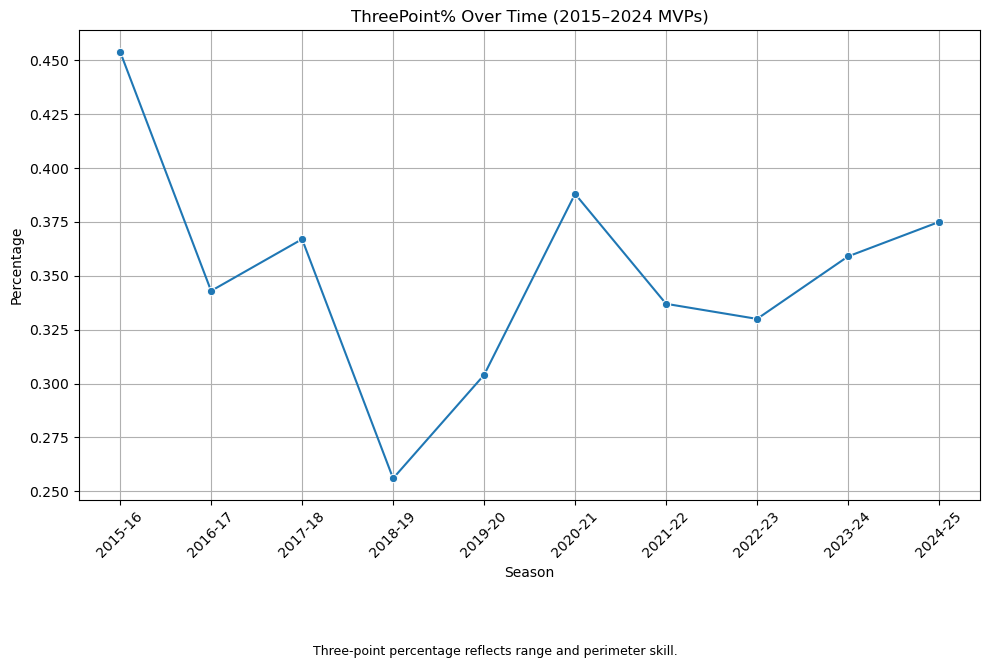

**Interpretation:** This line graph tracks how MVPs have performed from beyond the arc over the last decade. While three-point shooting hasbecome more central to NBA offenses, MVP-level efficiency from deep has varied.The 2015–16 MVP posted a standout percentage above 45%, the highest in the sample, likely reflecting the peak of an elite perimeter shooter.From 2016–17 through 2018–19, efficiency fluctuated, with a steep drop to around 26% in 2018–19, suggesting a shift in MVP profile that seasontoward a player whose value came from other facets.After 2019–20, percentages trended upward again, leveling out in the 33–38% range.The recent seasons (2023–25) show steady improvements in accuracy, but not dominance, highlighting a balanced perimeter game rather thandependence on elite long-range shooting.While three-point shooting is a key offensive tool, MVPs are not required to be the league’s top sharpshooters. Instead, a competent andtimely perimeter game—especially when paired with other strengths like playmaking, versatility, or efficiency inside the arc—has provensufficient for MVP status.

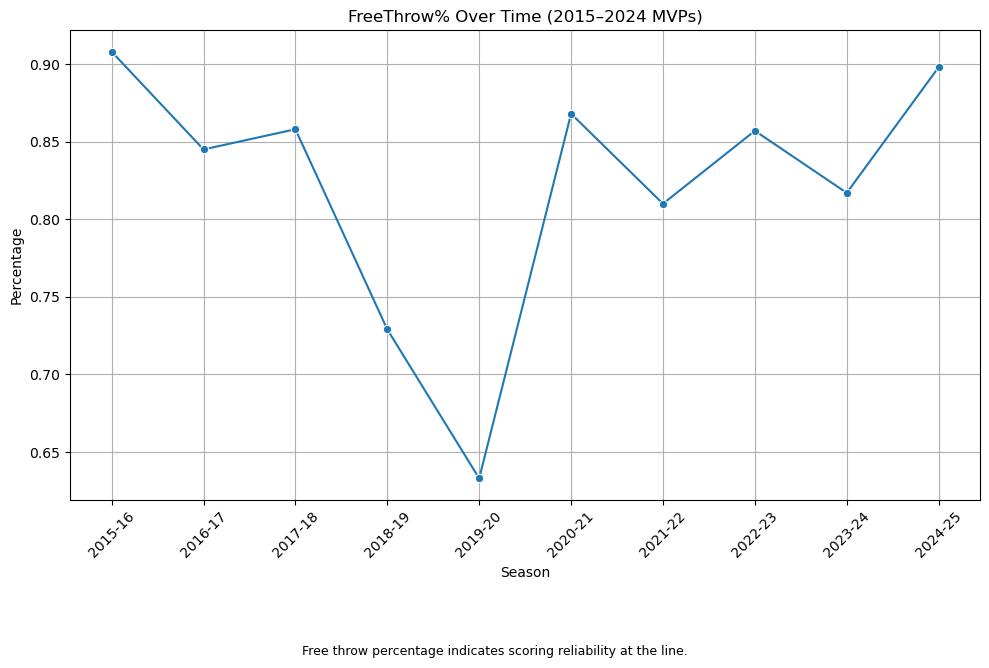

**Interpretation:** This line graph shows how reliable MVPs have been from the free throw line over the last decade. Free throw shooting isoften an underappreciated measure of scoring skill, particularly under pressure.The decade begins and ends strong, with MVPs in 2015–16 and 2024–25 hitting around 90%, reflecting elite-level touch and composure at the stripe.From 2016–18, FT% remained relatively high and stable in the mid-80s.A noticeable dip occurred from 2018–19 to 2019–20, bottoming out near 63% — the lowest of the decade — possibly highlighting a more interior-focused MVP whose value wasn’t tied to finesse scoring.Following that low, there’s a sharp recovery in 2020–21 and another strong stretch of consistency between 2021–2024, ranging from 81% - 86%.While elite free throw shooting is not a strict MVP requirement, the graph reinforces that most MVPs are dependable at the line. Evenfor big men or physical players who draw a lot of fouls, solid free throw efficiency is a valuable asset — often separating good scorersfrom great closers.

In [54]:
# Define efficiency-related stats and descriptions
efficiency_stats = {
    'FieldGoal%': {
        'description': 'Field goal percentage shows general shooting accuracy.',
        'interpretation': 'This line graph shows how MVP-level shooting efficiency has evolved across the last decade. The data reflects noticeable' 
        'shifts, with a significant climb in field goal percentage beginning around the 2018–19 season and sustaining high marks through 2023–24.'

        'Early seasons (2015–2018) featured more modest efficiency, with FG% occasionally dipping below 45%.'

        'A major jump occurs in 2018–19, aligning with the emergence of bigs and hybrid forwards who emphasize efficient, high-percentage shots'
        'near the rim.'

        'The 2021–22 and 2023–24 MVPs posted percentages above 58%, among the highest in the sample, highlighting the league’s emphasis on smart'
        'shot selection and analytics-informed play.'

        'Recent MVPs have demonstrated elite shot efficiency, with field goal percentages frequently hovering near or above 55%. This trend suggests' 
        'that voters are rewarding players who combine production with shot discipline — a key trait in today’s pace-and-space NBA landscape.'
    },

    'ThreePoint%': {
        'description': 'Three-point percentage reflects range and perimeter skill.',
        'interpretation': 'This line graph tracks how MVPs have performed from beyond the arc over the last decade. While three-point shooting has' 
        'become more central to NBA offenses, MVP-level efficiency from deep has varied.'

        'The 2015–16 MVP posted a standout percentage above 45%, the highest in the sample, likely reflecting the peak of an elite perimeter shooter.'

        'From 2016–17 through 2018–19, efficiency fluctuated, with a steep drop to around 26% in 2018–19, suggesting a shift in MVP profile that season'
        'toward a player whose value came from other facets.'

        'After 2019–20, percentages trended upward again, leveling out in the 33–38% range.'

        'The recent seasons (2023–25) show steady improvements in accuracy, but not dominance, highlighting a balanced perimeter game rather than'
        'dependence on elite long-range shooting.'

        'While three-point shooting is a key offensive tool, MVPs are not required to be the league’s top sharpshooters. Instead, a competent and' 
        'timely perimeter game—especially when paired with other strengths like playmaking, versatility, or efficiency inside the arc—has proven'
        'sufficient for MVP status.'
    },

    'FreeThrow%': {
        'description': 'Free throw percentage indicates scoring reliability at the line.',
        'interpretation': 'This line graph shows how reliable MVPs have been from the free throw line over the last decade. Free throw shooting is'
        'often an underappreciated measure of scoring skill, particularly under pressure.'

        'The decade begins and ends strong, with MVPs in 2015–16 and 2024–25 hitting around 90%, reflecting elite-level touch and composure at the stripe.'

        'From 2016–18, FT% remained relatively high and stable in the mid-80s.'

        'A noticeable dip occurred from 2018–19 to 2019–20, bottoming out near 63% — the lowest of the decade — possibly highlighting a more interior-focused '
        'MVP whose value wasn’t tied to finesse scoring.'

        'Following that low, there’s a sharp recovery in 2020–21 and another strong stretch of consistency between 2021–2024, ranging from 81% - 86%.'

        'While elite free throw shooting is not a strict MVP requirement, the graph reinforces that most MVPs are dependable at the line. Even' 
        'for big men or physical players who draw a lot of fouls, solid free throw efficiency is a valuable asset — often separating good scorers' 
        'from great closers.'
    }
}

# Ensure numeric
mvp_df[list(efficiency_stats.keys())] = mvp_df[list(efficiency_stats.keys())].apply(pd.to_numeric, errors='coerce')

# Plot each stat separately
for stat, content in efficiency_stats.items():
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=mvp_df, x='Season', y=stat, marker='o')
    plt.title(f"{stat} Over Time (2015–2024 MVPs)")
    plt.xlabel("Season")
    plt.ylabel("Percentage")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.figtext(0.5, -0.1, content['description'], wrap=True, ha='center', fontsize=9)
    plt.tight_layout()
    plt.show()

    # Print interpretation below plot (in Markdown, you'd use this as a cell)
    display(Markdown(f"**Interpretation:** {content['interpretation']}"))


**Efficiency Trends Summary (2015–2024 MVPs)**
Efficiency metrics offer insight into how MVPs generate their scoring not just how much they score, but how effectively they do it. Over the past decade, MVPs have shown a diverse mix of scoring profiles, with some leaning on perimeter precision and others excelling through inside dominance.

- Field Goal Percentage (FG%)
FG% has trended upward overall, with multiple MVPs surpassing the 55% mark in recent seasons. This suggests a broader appreciation for efficiency and shot selection, especially among big men and hybrid forwards who convert at high rates near the rim.

- Three-Point Percentage (3P%)
Three-point accuracy fluctuated throughout the decade, peaking early in 2015–16 and stabilizing in the mid-to-high 30% range in later years. While not every MVP was a sharpshooter, the consistent presence of MVPs with strong perimeter skills reflects the league’s evolution toward spacing and long-range shooting as critical offensive tools.

- Free Throw Percentage (FT%)
Despite a dip in the late 2010s, FT% generally remained high across MVPs, especially in recent seasons. This reliability at the line reinforces the expectation that MVPs are not just scoring threats but also dependable in high-pressure moments  a crucial trait for leaders and closers.

The efficiency trends reveal that there’s no single blueprint for MVP scoring — but being efficient, whether from the field, beyond the arc, or at the line, is consistently part of the formula. Today’s MVPs are expected to pair production with precision, demonstrating mastery across multiple scoring zones.

**3.4 Advanced Metrics Trends**

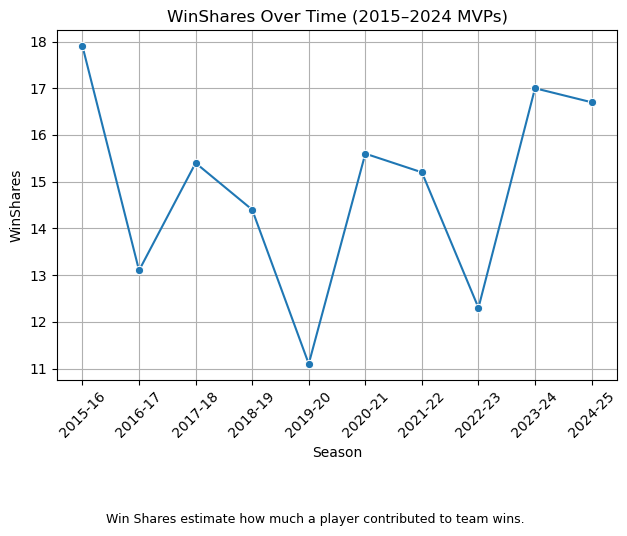

**Interpretation:** Win Shares estimate how much a player contributes to team success — factoring in both offensive and defensive impact.For MVPs, this metric captures how essential a player was to their team overall performance.High Baseline: Across the board, MVPs consistently produced double-digit Win Share totals. Even in seasons with slight dips, MVP-levelplayers maintained strong all-around value.2015–16 and 2023–24 Peaks: These two seasons stand out with the highest Win Share values, approaching or surpassing 17. This suggestsespecially dominant campaigns — not just statistically, but in terms of direct influence on wins.2019–20 Dip: The noticeable drop to just over 11 Win Shares may reflect a shortened season or a more balanced team context, where the MVP’s individual contribution, while still elite, wasn’t as heavily leaned on.Recent Stability: From 2020–21 onward, Win Shares rebounded and stabilized, indicating that MVP voters continued to value players whoanchored team success on both ends of the floor.The consistency of high Win Shares reinforces a core standard: MVPs aren’t just prolific — they are the foundation of winning basketball.While highlight plays and scoring volume matter, the award still strongly reflects measurable impact on team success.

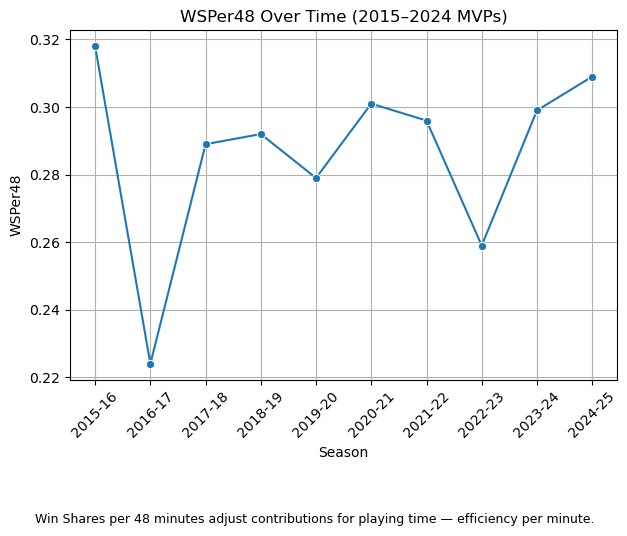

**Interpretation:** Win Shares per 48 minutes provide a pace-adjusted look at player impact, offering a cleaner measure of how productiveMVPs were relative to their time on the floor.Strong Baseline: Across the decade, MVPs consistently posted WSPer48 values above 0.25 — well above the league-average benchmark of0.10 — signaling elite efficiency regardless of minutes played.2015–16 Spike: The highest mark near 0.32 in 2015–16 indicates an MVP season of exceptional per-minute value, combining dominance withefficiency.2016–17 Dip: A noticeable drop around 0.22 marks the lowest value of the sample, still strong by league standards but suggesting an MVPwith more volume-based contributions than elite per-minute output.2020s Consistency: From 2018–19 onward, the metric stabilizes, hovering around the 0.29–0.31 range. This stretch reflects a modern MVPmold: high efficiency in structured systems with managed minutes.2022–23 Valley and Rebound: A mid-decade dip is followed by a quick return to top-tier efficiency, showing that MVPs have maintained theirability to make every minute count, even as league pacing and roles evolve.WSPer48 underscores a defining trait of MVPs in the modern era — it’s not just about how long they play, but how much impact they createin the time they’re given. Efficiency per possession has become just as important as overall totals in MVP voting.

In [56]:
# Define advanced metrics and their descriptions
advanced_stats = {
    'WinShares':{
        'description': 'Win Shares estimate how much a player contributed to team wins.',
        'interpretation': 'Win Shares estimate how much a player contributes to team success — factoring in both offensive and defensive impact.'
        'For MVPs, this metric captures how essential a player was to their team overall performance.'

        'High Baseline: Across the board, MVPs consistently produced double-digit Win Share totals. Even in seasons with slight dips, MVP-level' 
        'players maintained strong all-around value.'

        '2015–16 and 2023–24 Peaks: These two seasons stand out with the highest Win Share values, approaching or surpassing 17. This suggests' 
        'especially dominant campaigns — not just statistically, but in terms of direct influence on wins.'

        '2019–20 Dip: The noticeable drop to just over 11 Win Shares may reflect a shortened season or a more balanced team context, where the MVP’s '
        'individual contribution, while still elite, wasn’t as heavily leaned on.'

        'Recent Stability: From 2020–21 onward, Win Shares rebounded and stabilized, indicating that MVP voters continued to value players who' 
        'anchored team success on both ends of the floor.'

        'The consistency of high Win Shares reinforces a core standard: MVPs aren’t just prolific — they are the foundation of winning basketball.' 
        'While highlight plays and scoring volume matter, the award still strongly reflects measurable impact on team success.'
    },

    'WSPer48': {
        'description': 'Win Shares per 48 minutes adjust contributions for playing time — efficiency per minute.',
        'interpretation': 'Win Shares per 48 minutes provide a pace-adjusted look at player impact, offering a cleaner measure of how productive' 
        'MVPs were relative to their time on the floor.'

        'Strong Baseline: Across the decade, MVPs consistently posted WSPer48 values above 0.25 — well above the league-average benchmark of' 
        '0.10 — signaling elite efficiency regardless of minutes played.'

        '2015–16 Spike: The highest mark near 0.32 in 2015–16 indicates an MVP season of exceptional per-minute value, combining dominance with' 
        'efficiency.'

        '2016–17 Dip: A noticeable drop around 0.22 marks the lowest value of the sample, still strong by league standards but suggesting an MVP' 
        'with more volume-based contributions than elite per-minute output.'

        '2020s Consistency: From 2018–19 onward, the metric stabilizes, hovering around the 0.29–0.31 range. This stretch reflects a modern MVP' 
        'mold: high efficiency in structured systems with managed minutes.'

        '2022–23 Valley and Rebound: A mid-decade dip is followed by a quick return to top-tier efficiency, showing that MVPs have maintained their' 
        'ability to make every minute count, even as league pacing and roles evolve.'

        'WSPer48 underscores a defining trait of MVPs in the modern era — it’s not just about how long they play, but how much impact they create' 
        'in the time they’re given. Efficiency per possession has become just as important as overall totals in MVP voting.'
    },
    
}

# Ensure numeric
mvp_df[list(advanced_stats.keys())] = mvp_df[list(advanced_stats.keys())].apply(pd.to_numeric, errors='coerce')

# Plot each stat separately
for stat, content in advanced_stats.items():
    sns.lineplot(data=mvp_df, x='Season', y=stat, marker='o')
    plt.title(f"{stat} Over Time (2015–2024 MVPs)")
    plt.xlabel("Season")
    plt.ylabel(stat)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.figtext(0.5, -0.1, content['description'], wrap=True, ha='center', fontsize=9)
    plt.tight_layout()
    plt.show()

    # Print interpretation below plot (in Markdown, you'd use this as a cell)
    display(Markdown(f"**Interpretation:** {content['interpretation']}"))


**Advanced Metrics Trend Summary (2015–2024 MVPs)**

The evolution of MVPs over the last decade is captured not just through traditional stats, but in advanced metrics that highlight efficiency, value, and impact on team success. Both Win Shares (WS) and Win Shares per 48 Minutes (WSPer48) offer a deeper lens into what separates MVP-caliber seasons.

- Win Shares (WS) show how much a player contributed to overall team wins. The trend reveals peaks in 2015–16 and 2023–24, with MVPs often hovering above 15 WS — a strong indicator of direct influence on winning outcomes.

- Despite year-to-year dips (notably in 2019–20 and 2022–23), WS remains a stable foundation in MVP cases, signaling that voters consistently reward players whose performance translates to victories.

- WSPer48, which adjusts for minutes played, reveals another key insight: efficiency is just as valuable as volume. Most MVPs landed between 0.28 and 0.31 WSPer48, far surpassing the league average, regardless of whether they logged high minutes or not.

- Together, these metrics confirm a shift in MVP evaluation: dominance alone is no longer enough. Impact per minute and win translation matter, favoring players who are not just productive — but decisively effective every time they touch the court.

Conclusion: The modern MVP is defined by more than stats — it’s about translating production into wins efficiently. Whether through long minutes or elite per-possession play, MVPs from the past decade consistently delivered both quality and consequence.



**Performance Profile Trends: Connecting the Dots Across MVP Categories (2015–2024)**

Across ten seasons of MVP data, distinct patterns emerge when comparing offensive, defensive, efficiency, and advanced statistical trends.

Offensive Metrics
MVPs have consistently shouldered heavy scoring and playmaking responsibilities. While points per game varied from season to season, the majority of MVPs hovered above the 28 PPG mark. Assist numbers reveal how some MVPs functioned as hybrid scorers and facilitators, with standout years from players who ran the offense. Minutes played remained relatively stable across seasons, reinforcing the idea that MVPs are central to their team’s on-court execution — not just in impact, but in availability.

Defensive Metrics
Defensive stats told a more varied story. Rebounds per game fluctuated widely, indicating that some MVPs anchored the paint while others contributed more selectively on the boards. Steals and blocks showed similarly diverse profiles — some MVPs excelled in rim protection, while others leaned into quick hands and passing lane disruption. Unlike offense, there was no single defensive template for MVP success.

Efficiency Metrics
When it comes to efficiency, most MVPs remained reliably strong. Field goal percentage showed a clear upward trend from early in the decade, reflecting the rise of shot selection analytics and inside-out scoring. Three-point percentage, while more volatile, still featured several seasons above league average, showing that MVPs don’t necessarily need to be elite shooters — just consistent enough. Free throw percentage, however, was remarkably stable, reinforcing the importance of capitalizing on high-value scoring opportunities.

Advanced Metrics
Advanced stats like Win Shares and Win Shares per 48 tied all categories together. These metrics captured total value — not just raw output, but how efficiently and consistently that output translated into team wins. The data revealed that while MVPs arrived through different statistical routes, they shared one thing in common: exceptional value creation, regardless of play style.

Together, these trends emphasize that there is no single MVP mold — only a collection of dominant traits that shift with context, team structure, and season narrative.

### From Trends to Standouts: Why Standardization Matters

Though season-level trends reveal how MVP profiles have evolved, comparing players across different statistical categories still has its limits. Scoring, rebounding, and efficiency all operate on different scales — and raw numbers alone can mask just how exceptional a season truly was.

To spotlight the most dominant performances regardless of metric, the next section applies a z-score transformation.

**3.5 Z-Score Transformation**

Standardizing MVP stats to reveal how stat profiles deviate from the norm

To compare MVPs across different years and scales, key metrics were standardized using Z-scores. This allows for consistent measurement of how far each MVP’s performance deviated from the decade’s statistical average.

Standardized variables include scoring, rebounding, assisting, and efficiency. This method highlights outlier MVP performances and changing expectations over time.

**2 Z-Score Normalization of MVP Stats**

 Create a standardized (z-score) version of key MVP stats for better comparison over time

In [29]:
# Define which stats to normalize
zscore_stats = ['PointsPerGame', 'AssistsPerGame', 'ReboundsPerGame',
                'StealsPerGame', 'BlocksPerGame', 'MinutesPerGame',
                'FieldGoal%', 'ThreePoint%', 'FreeThrow%', 'WinShares', 'WSPer48']

# Ensure all selected stats are numeric
mvp_df[zscore_stats] = mvp_df[zscore_stats].apply(pd.to_numeric, errors='coerce')

# Create a new DataFrame to hold the z-scored stats so we don't alter the original
z_df = mvp_df.copy()
z_df[zscore_stats] = z_df[zscore_stats].apply(zscore)

**3.5.1 Z-Score: Offensive Stats**

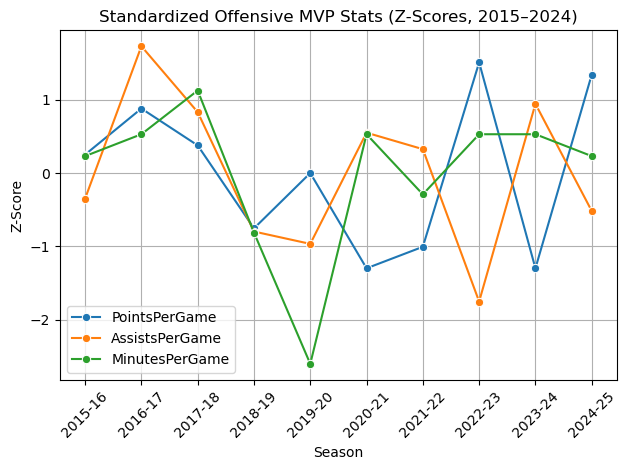

In [57]:
# Define which offensive stats to include in the z-score visualization
category_stats = ['PointsPerGame', 'AssistsPerGame', 'MinutesPerGame']

# Loop through each stat and plot its standardized values over time
for stat in category_stats:
    sns.lineplot(data=z_df, x='Season', y=stat, marker='o', label=stat)

# Plotting the standardized stats
plt.title("Standardized Offensive MVP Stats (Z-Scores, 2015–2024)")
plt.xlabel("Season")
plt.ylabel("Z-Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### Offensive Performance Over Time (Z-Score Analysis)
This line graph visualizes how each MVP’s offensive contributions compared to the decade’s average, using standardized Z-scores for points per game, assists per game, and minutes played.

**Peaks & Outliers:**
- 2022–23 and 2024–25 MVPs stand out for scoring far above average, with Z-scores nearing or exceeding +1.5, marking them as elite scorers relative to the 10-year trend.

- 2018–19 and 2019–20 MVPs showed simultaneous dips across all three metrics, suggesting more balanced or team-oriented roles rather than high-volume offensive dominance.

**Assists vs Scoring Balance:**

- The 2016–17 MVP registered a peak in assists (+1.7) and was also well above average in points and minutes, indicating an all-around offensive engine.

- In contrast, 2022–23 reveals a scoring-heavy profile (high PPG Z-score) but a below-average assist rate — highlighting a more isolation-based scoring style.

**Minutes Played:**

- Most MVPs played near the average number of minutes, with exceptions in 2019–20 and 2018–19, where Z-scores for minutes dropped below –2.0. These may reflect injury management, deep rotations, or strategic load balancing without diminishing impact.

**Offensive Archetypes Over Time:**
The chart highlights how MVPs aren’t always dominant in every offensive stat. Some earned the title by carrying heavy scoring loads, others by playmaking, and a few through efficient impact in slightly lower minutes.

**3.5.2 Z-Score: Defensive Stats**

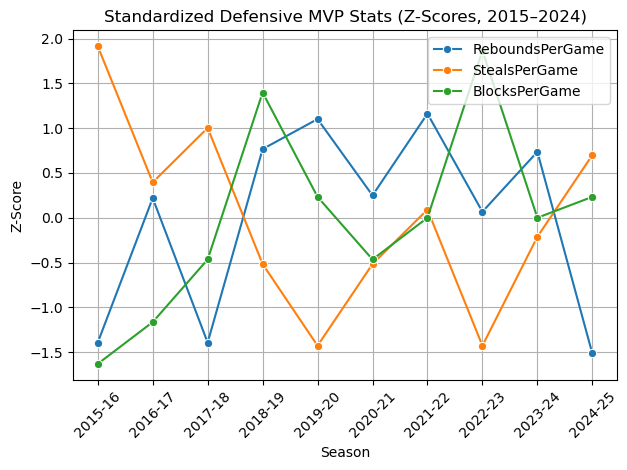

In [58]:
# Define which offensive stats to include in the z-score visualization
category_stats = ['ReboundsPerGame', 'StealsPerGame', 'BlocksPerGame']

# Loop through each stat and plot its standardized values over time
for stat in category_stats:
    sns.lineplot(data=z_df, x='Season', y=stat, marker='o', label=stat)

# Plotting the standardized defensive stats
plt.title("Standardized Defensive MVP Stats (Z-Scores, 2015–2024)")
plt.xlabel("Season")
plt.ylabel("Z-Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Defensive Contributions Over Time (Z-Score Analysis)

This graph shows how MVPs performed on the defensive end relative to the decade’s average, using Z-scores for rebounds, steals, and blocks per game.

**Elite Defensive MVPs:**

- 2015–16 and 2018–19 MVPs delivered standout performances in steals and blocks, respectively, with Z-scores well above +1.0. These seasons reflected high defensive disruption and rim protection, respectively.

- 2021–22 and 2022–23 MVPs posted above-average rebounds and blocks, suggesting a strong interior defensive presence and rebounding control.

**Balanced vs Specialized Defenders:**

- Some MVPs (e.g., 2019–20, 2023–24) hovered around average across all three defensive categories, indicating balanced but non-specialist profiles.

- Others, like the 2015–16 MVP, had extremely high steals but below-average rebounds and blocks, signaling perimeter-oriented defenders.

**Variability in Defensive Pathways:**

- MVPs didn’t need to be dominant across all defensive stats.
    - For instance:
        - 2018–19 stood out with elite shot-blocking (Z ≈ +1.4) but below-average steals.
        - 2016–17 had modest scores across the board but still earned MVP, likely due to offensive dominance.

**Low Defensive Years:**

2017–18 and 2019–20 show consistently below-average Z-scores in multiple defensive metrics. These may represent MVPs whose selection leaned more on offensive output or team performance rather than individual defense.

**3.5.3 Z-Score: Efficiency Stats**

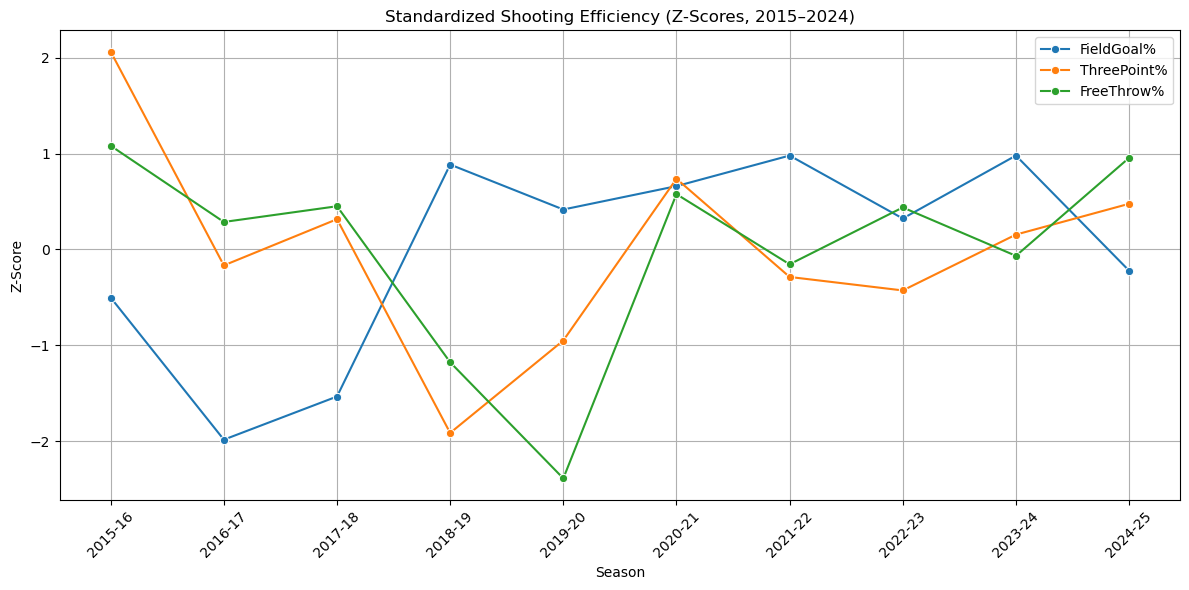

In [ ]:
# Define which offensive stats to include in the z-score visualization
category_stats = ['FieldGoal%', 'ThreePoint%', 'FreeThrow%']

# Loop through each stat and plot its standardized values over time
for stat in category_stats:
    sns.lineplot(data=z_df, x='Season', y=stat, marker='o', label=stat)

# Plotting the standardized efficiency stats
plt.title("Standardized Shooting Efficiency (Z-Scores, 2015–2024)")
plt.xlabel("Season")
plt.ylabel("Z-Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Shooting Efficiency Trends Among MVPs (Z-Score Analysis)**
This graph examines how MVPs’ shooting efficiency — measured by field goal percentage, three-point percentage, and free throw percentage — deviated from the average over the past decade using Z-scores.

**Notable Highs and Lows:**
- 2015–16 MVP stood out with exceptional three-point shooting (Z ≈ +2.0) and strong free throw percentage, despite a below-average field goal percentage likely indicating a perimeter-heavy scorer.

- 2016–17 and 2017–18 MVPs had below-average FG% (Z ≈ -2.0 and -1.5), but hovered near-average in 3P% and FT%, highlighting efficient scoring despite poor raw shooting from the field.

- 2018–19 and 2019–20 saw low three-point and free throw percentages, with Z-scores dipping below -2.0 the lowest across the decade suggesting MVPs that year leaned on volume, inside scoring, or non-shooting contributions.

**Efficiency Balance and Recovery:**
From 2020–21 onward, there was a return to more balanced efficiency profiles:

- FG%, 3P%, and FT% generally stayed within one standard deviation from the mean.

- 2023–24 and 2024–25 MVPs showcased strong free throw consistency (Z ≈ +1.0) alongside near-average FG% and 3P%, pointing to polished, well-rounded shooters.

**Implications:**
The variability in three-point and free throw Z-scores reflects how MVPs range from elite shooters to impact players who thrive in other ways.

Across the decade, FG% became more consistent, with fewer extreme outliers, possibly indicating shifts in shot selection, spacing, or overall efficiency across the league.

**3.5.4 Z-Score: Advance Stats**

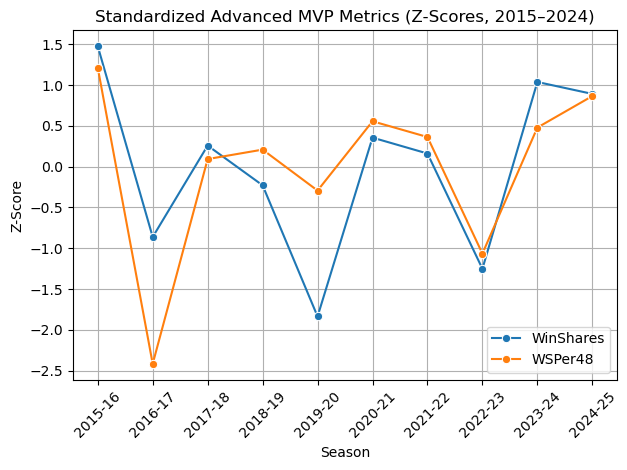

In [59]:
## Define which offensive stats to include in the z-score visualization
category_stats = ['WinShares', 'WSPer48']

# Loop through each stat and plot its standardized values over time
for stat in category_stats:
    sns.lineplot(data=z_df, x='Season', y=stat, marker='o', label=stat)

# Plotting the standardized advanced stats
plt.title("Standardized Advanced MVP Metrics (Z-Scores, 2015–2024)")
plt.xlabel("Season")
plt.ylabel("Z-Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**Standardized Advanced MVP Metrics (2015–2024):**

This graph compares standardized values for two advanced impact metrics: Win Shares (WS) and Win Shares per 48 minutes (WSPer48). Both metrics reflect how much value a player provides, with WS capturing total contribution over the season and WSPer48 adjusting that output by playing time.

- 2015–16 stands out with exceptionally high Z-scores in both metrics, indicating an MVP season well above the decade average in terms of total and per-minute impact.

- 2016–17 reveals a sharp contrast, with both WS and WSPer48 dipping well below the average. Despite winning MVP, the player that season was less statistically dominant by advanced metrics.

- 2019–20 also ranks among the lowest for WS, while WSPer48 hovers just below average suggesting a less productive MVP season overall.

- The 2023–24 and 2024–25 seasons show a return to high standardized efficiency, with values comfortably above the mean for both stats.

- Throughout the decade, WS and WSPer48 largely move in sync, reinforcing how closely total impact and efficiency tend to track for MVP-caliber players.

Together, these metrics highlight not just output, but value per minute a critical lens in today’s NBA where player efficiency and load management go hand in hand. The best MVP seasons combine volume and elite efficiency, and this chart pinpoints when that balance was achieved.

#### Z-Score Trends Summary (2015–2024 MVPs)
Standardizing MVP stats with Z-scores reveals how each season compares to the decade’s norm — highlighting statistical outliers and shifting performance expectations.

**Offensive Trends**
- Peaks in 2016–17 and 2022–23 show standout scoring and assists.

- 2018–20 seasons dipped below average, suggesting less conventional MVP profiles.

- Minutes played remained consistently above average, reaffirming MVPs’ central role.

**Defensive Trends**
- Defensive impact varied by position: 2015–16 excelled in steals; 2018–19 in blocks and rebounds.

- Some MVPs showed moderate defense but contributed in other impactful ways.

**Efficiency Trends**
- Field goal and free throw percentages stayed reliably strong.

- Three-point shooting fluctuated the most, showing it enhances but isn't essential for MVP success.

**Advanced Metrics**
- 2015–16 leads in both Win Shares and WSPer48.

- Recent MVPs show a return to well-rounded efficiency after mid-decade dips.

**Take away:**
Z-scores expose which MVPs were statistical standouts and when performance expectations shifted — showing that MVP value can come from dominance, balance, or situational impact.

### Summary Table

To contextualize the trends and Z-score analyses, the table below presents descriptive statistics for all MVPs from the past decade. It includes the mean, median, standard deviation, minimum, and maximum for each key performance metric — offering a baseline for comparison across seasons.

In [ ]:
# Select only numeric columns for MVP stats
numeric_cols = mvp_df.select_dtypes(include='number').columns

# Create summary statistics
summary_df = mvp_df[numeric_cols].agg(['mean', 'median', 'std', 'min', 'max'])

# Transpose and round the values
summary_df = summary_df.T.round(2)

# Rename the index for clarity (if needed)
summary_df.index.name = 'Stat'

# Save the summary table to a CSV file
summary_df.to_csv('Data/mvp_summary_stats.csv')

# Display the summary table
summary_df




,mean,median,std,min,max
Stat,,,,,
Age,26.50,26.50,1.51,24.00,28.00
GamesPlayed,73.40,73.00,5.74,63.00,81.00
MinutesPerGame,33.89,34.40,1.41,30.40,35.40
PointsPerGame,29.50,29.80,2.52,26.40,33.10
ReboundsPerGame,9.98,10.75,3.46,5.00,13.80
AssistsPerGame,7.32,7.30,1.88,4.20,10.40
StealsPerGame,1.47,1.45,0.35,1.00,2.10
BlocksPerGame,0.90,0.90,0.45,0.20,1.70
FieldGoal%,0.53,0.55,0.06,0.42,0.58


This summary reinforces several patterns observed earlier in the analysis. MVPs over the past decade:

Averaged nearly 30 points per game and 34 minutes, showing high offensive output and consistent court presence.

Had strong all-around contributions, averaging 10 rebounds and 7 assists, confirming the rise of multi-dimensional MVPs.

Demonstrated notable efficiency, with field goal percentages over 50%, three-point shooting around 35%, and free throw accuracy exceeding 80%.

Averaged a Win Shares score near 15, underscoring their sustained impact on team success.

These figures reflect how the modern MVP archetype blends scoring, playmaking, and efficiency — not just one-dimensional dominance.



**Section 3.6: Correlation Matrix of MVP Stats**
To better understand how different performance metrics relate to one another, a correlation matrix was generated. This analysis explores the statistical relationships between offensive production, defensive contributions, efficiency measures, and advanced impact metrics among MVPs from 2015 to 2024.

Strong correlations can reveal which combinations of stats tend to define MVP-level seasons — for example, whether high scorers also rebound well, or if efficiency metrics like field goal percentage align closely with overall value indicators like Win Shares.

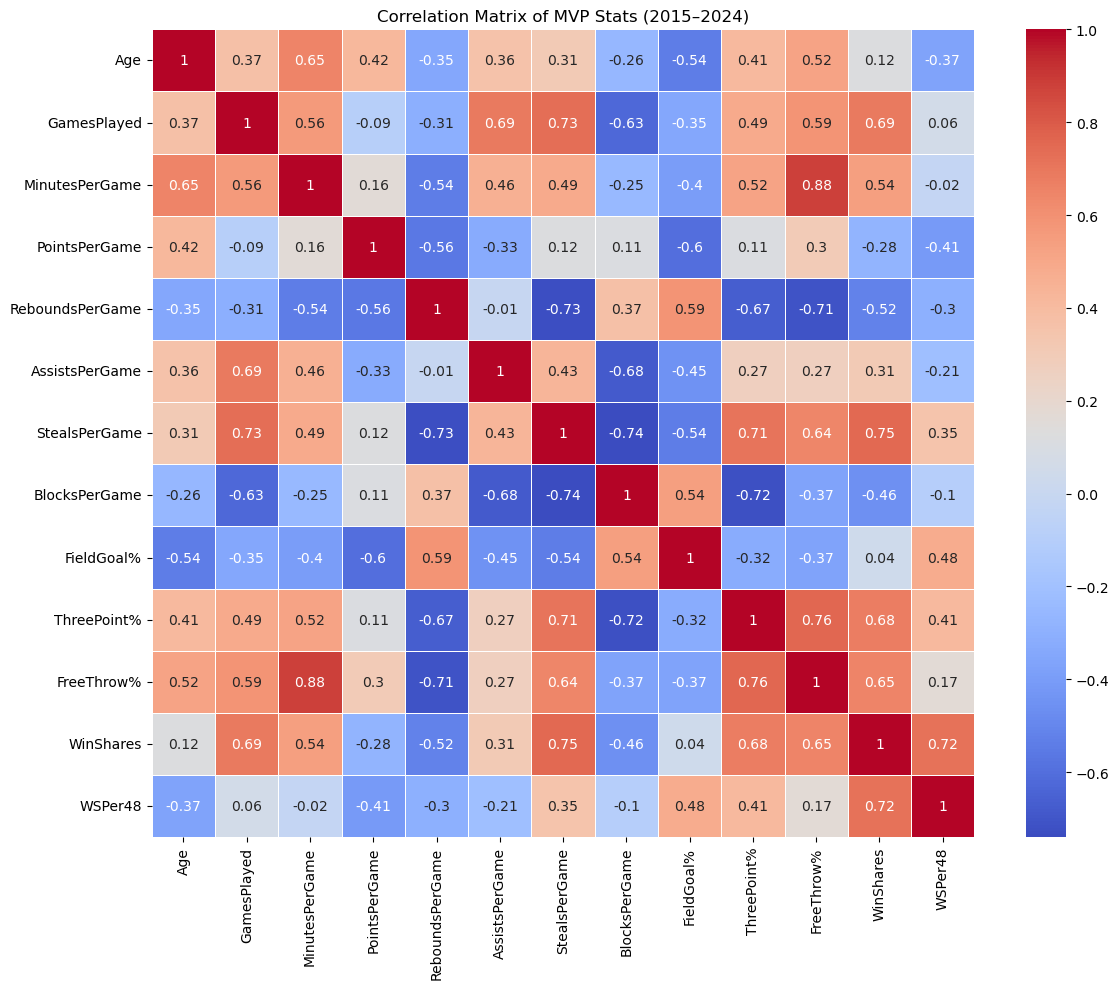

In [35]:
# Select numeric columns only
numeric_cols = mvp_df.select_dtypes(include='number')

# Compute correlation matrix
correlation = numeric_cols.corr().round(2)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of MVP Stats (2015–2024)")
plt.tight_layout()
plt.show()


#### Correlation Matrix Analysis (2015–2024 MVPs)

This matrix reveals how MVP statistics relate to one another which traits tend to rise or fall together, and which ones operate independently. It offers insight into how MVP value is shaped across different areas of the game.

**Strong Positive Relationships:**
- MinutesPerGame ↔ GamesPlayed (0.65)
    No surprise here: MVPs who log the most minutes per game tend to stay healthy and available throughout the season. Durability and workload are closely tied for elite performers.

- WinShares ↔ MinutesPerGame (0.54), AssistsPerGame (0.46), and StealsPerGame (0.65)
    These correlations suggest that MVPs who generate wins aren’t always the top scorers — instead, they often contribute through playmaking, defensive activity, and availability. Steals especially stand out, reinforcing that disruptive defenders tend to add more cumulative value.

- WSPer48 ↔ FieldGoal% (0.48) and ThreePoint% (0.41)
    Efficiency metrics like shooting percentages are positively tied to Win Shares per 48, which measures per-minute productivity. This highlights how efficient scoring is more predictive of impact than raw point totals.

- ThreePoint% ↔ FreeThrow% (0.76)
    Strong shooters tend to be reliable across distances. This consistency suggests that shooting mechanics and touch are transferable between the perimeter and the stripe — a trait common in modern MVPs.

**Weak or Negative Relationships:**
- PointsPerGame ↔ WSPer48 (-0.41) and PointsPerGame ↔  WinShares (-0.28)
    Perhaps most striking: scoring volume alone does not strongly correlate with value-based metrics. MVPs who score a lot aren’t necessarily the most efficient or impactful. It reflects a shift in MVP voting criteria toward well-rounded impact.

- BlocksPerGame ↔ WSPer48 (-0.10)
    Despite the visual appeal of blocks, this low correlation suggests rim protection alone doesn’t drive per-minute efficiency or team wins — likely because block-heavy players don’t always contribute across other categories.

- AssistsPerGame ↔ ReboundsPerGame (-0.01)
    A very weak link between playmaking and rebounding shows how MVPs tend to specialize: either floor generals or dominant board-crashers, rarely both.

- ReboundsPerGame ↔ PointsPerGame (-0.56)
    Interestingly, MVPs with high rebounding numbers often score less. This again points to positional trends — bigs vs. guards — rather than an inherent contradiction in skill.

**Takeaways:**
- Scoring alone is no longer the gold standard — efficiency, availability, and versatility play a bigger role in defining MVP value.

- Defensive activity (steals) and shooting efficiency are better MVP indicators than blocks or raw point totals.

- Modern MVPs are increasingly complete players, blending playmaking, shooting, and durability to maximize overall impact.

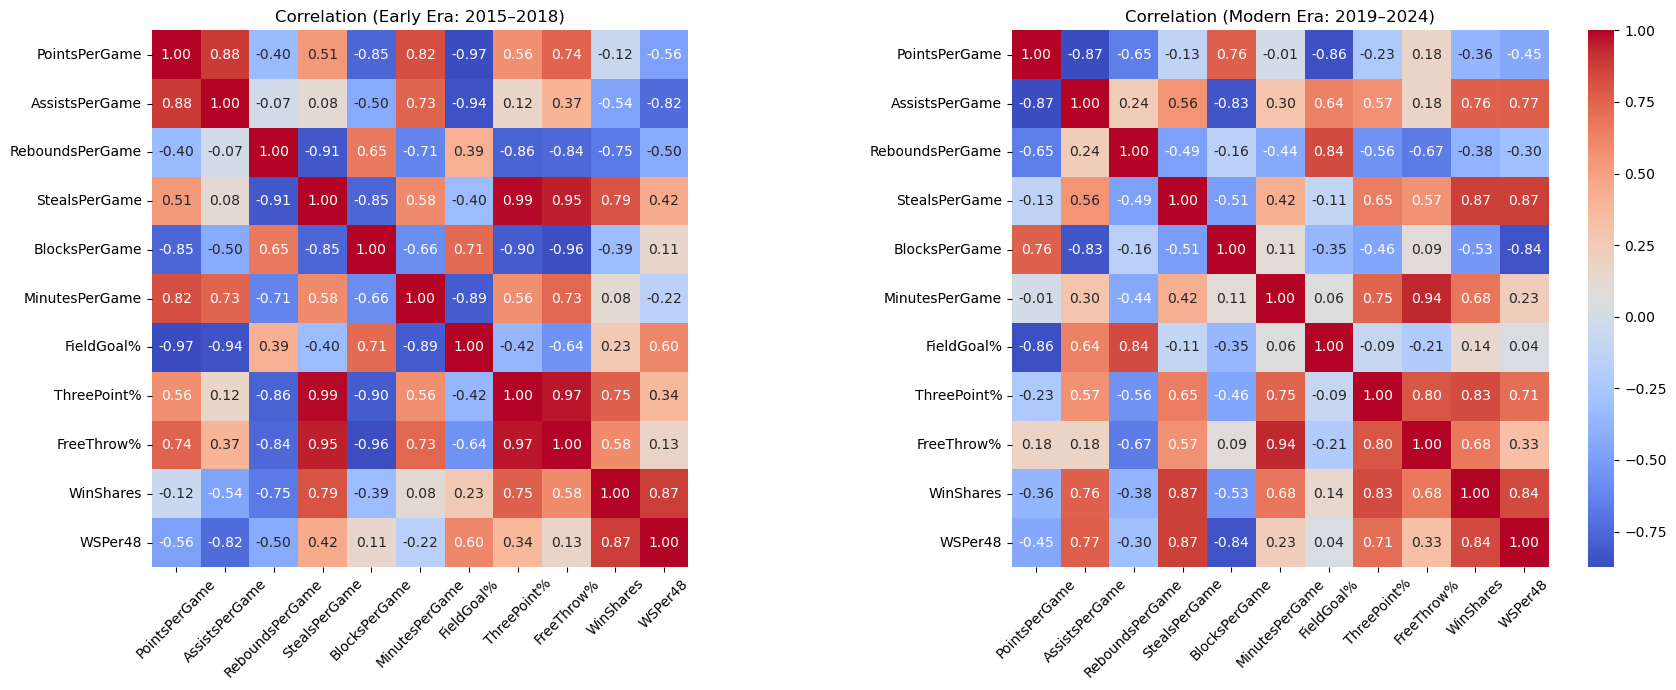

In [36]:
# Create an era label based on season
def classify_era(season_str):
    start_year = int(season_str.split('-')[0])
    return 'Early' if start_year <= 2018 else 'Modern'

mvp_df['Era'] = mvp_df['Season'].apply(classify_era)
# Select only numeric stats
numeric_stats = [
    'PointsPerGame', 'AssistsPerGame', 'ReboundsPerGame',
    'StealsPerGame', 'BlocksPerGame', 'MinutesPerGame',
    'FieldGoal%', 'ThreePoint%', 'FreeThrow%',
    'WinShares', 'WSPer48'
]

# Compute correlation matrices by era
early_corr = mvp_df[mvp_df['Era'] == 'Early'][numeric_stats].astype(float).corr()
modern_corr = mvp_df[mvp_df['Era'] == 'Modern'][numeric_stats].astype(float).corr()

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.heatmap(early_corr, ax=axes[0], annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=False)
axes[0].set_title("Correlation (Early Era: 2015–2018)")
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=0)

sns.heatmap(modern_corr, ax=axes[1], annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True)
axes[1].set_title("Correlation (Modern Era: 2019–2024)")
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()


#### Comparing MVP Stat Relationships Over Time (2015–2018 vs. 2019–2024)

These dual heatmaps reveal how the statistical relationships between MVP performance metrics have shifted over the past decade, highlighting subtle but important evolutions in what defines value in the NBA.

##### Key Shifts in MVP Stat Correlations
***Scoring vs. Efficiency (PointsPerGame and FieldGoal%)**
- Early Era: Strong negative correlation (-0.97) higher scorers often had lower FG%.

- Modern Era: Still negative (-0.86) but slightly less so, indicating that modern MVPs are becoming more efficient scorers, closing the gap between volume and accuracy.

**Assists and Win Shares**
- Early Era: Modest negative correlation (-0.54).

- Modern Era: Strong positive correlation (0.76).

This suggests, playmaking is now more central to MVP value, especially with the rise of players like Nikola Jokić and other high-assist forwards.

**Blocks and PointsPerGame**
- Early Era: Strong negative (-0.85) players who blocked shots weren’t high scorers.

- Modern Era: Strong positive (0.76) a sharp reversal, highlighting the rise of two-way MVPs who can score and protect the rim (e.g., Giannis).

**ThreePoint% and FreeThrow%**
Strong in both eras (0.97 ➝ 0.80), suggesting shooting fundamentals have remained tightly linked, though there's slight decline, possibly reflecting more diverse MVP skillsets today.

**Rebounds and Steals**
- Early Era: Strong negative correlation (-0.91).

- Modern Era: Weak to moderate (-0.49).

MVPs are less defined by traditional positional archetypes rebounding bigs and active defenders are now not as mutually exclusive.

**Win Shares and WSPer48**
Strong in both eras (0.87 ➝ 0.84), showing that total contribution and per-minute impact continue to move in tandem regardless of the era.

**Takeaway:**
This shift from isolated roles (high scorer vs. rim protector) to multidimensional MVP profiles reflects how modern MVPs are expected to contribute across the board. Statistical relationships once defined by traditional positions are giving way to more versatile, holistic impact especially in playmaking and two-way performance.

#### Summary: Changing MVP Stat Relationships Over Time

The correlation analyses both over the full decade and split between early and modern MVPs reveal how the statistical DNA of an MVP has evolved. In the earlier years, performance metrics like scoring, rebounding, and defense were more siloed, often moving in opposition. In contrast, modern MVPs increasingly blur those lines, showing positive relationships across areas like scoring, playmaking, and rim protection.

This shift answers the guiding question by illustrating that MVP value is no longer tied to dominance in a single category. Instead, today’s MVPs are often multi-dimensional contributors whose well-rounded impact aligns with the NBA’s changing style faster pace, positionless play, and data-informed decision-making.

### Section 4: MVP Archetypes & Player Style Analysis
To move beyond the numbers, MVPs were grouped into performance-based archetypes based on their statistical profiles. This framework highlights not just what MVPs accomplished, but how they did it revealing the stylistic diversity behind the award.

**Archetype definitions:**

- Scorer – High points per game, lower assist totals; reflects offensive focal points and isolation-heavy roles.

- All-Around – Strong outputs across points, rebounds, and assists; captures versatile impact on multiple phases of the game.

- Defensive – Above-average steals and/or blocks; represents MVPs anchored by elite defensive presence.

- Balanced – No statistical outliers, but consistently strong across most categories; often steady leaders with efficient production.

These categories help clarify the types of players that have been rewarded with MVP honors whether explosive scorers, do-it-all engines, or defensive anchors and how those profiles have shifted over time.

**4.1  MVP Trend Relationship: Points vs Assists (with Regression)**

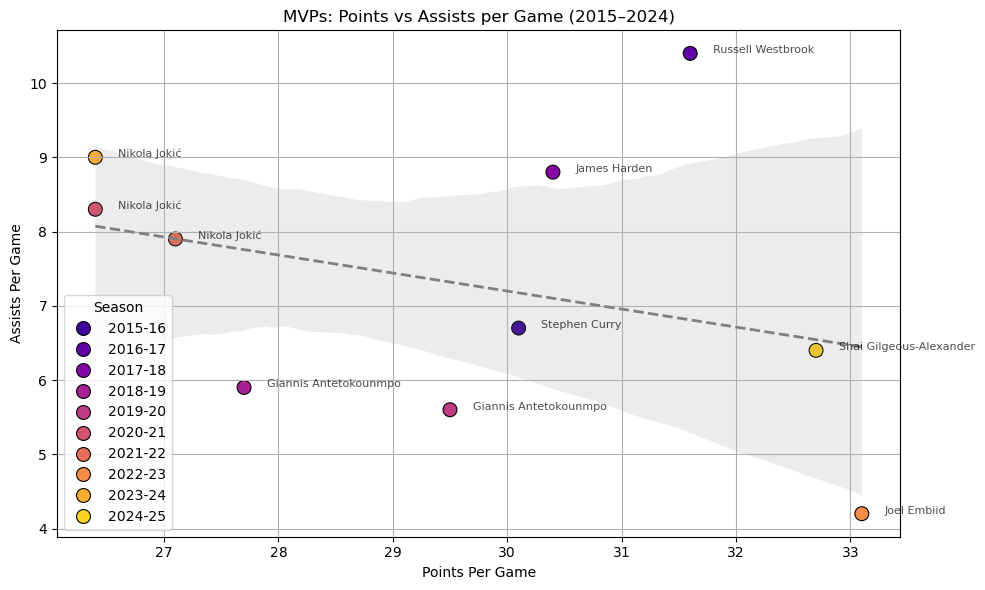

In [37]:
# Visualizing the relationship between scoring and playmaking over time (color-coded by season)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=mvp_df,
    x='PointsPerGame',
    y='AssistsPerGame',
    hue='Season',
    palette='plasma',
    s=100,
    edgecolor='black'
)

# Add regression line
sns.regplot(
    data=mvp_df,
    x='PointsPerGame',
    y='AssistsPerGame',
    scatter=False,
    color='gray',
    line_kws={'linewidth': 2, 'linestyle': 'dashed'}
)

# Annotate player names
for _, row in mvp_df.iterrows():
    plt.text(row['PointsPerGame'] + 0.2, row['AssistsPerGame'], row['Player'], fontsize=8, alpha=0.7)

# Labels and formatting
plt.title('MVPs: Points vs Assists per Game (2015–2024)')
plt.xlabel('Points Per Game')
plt.ylabel('Assists Per Game')
plt.grid(True)
plt.tight_layout()
plt.show()

This scatterplot of Points vs Assists per Game for MVPs from 2015 to 2024 visually maps how scoring and playmaking intersect across different award winners and reveals meaningful archetypal trends.

**Negative Trendline:** The downward-sloping regression line suggests an inverse relationship MVPs who scored more tended to assist less, and vice versa. This reinforces the idea that MVPs often lean toward either primary scoring or primary facilitating, but not both at peak levels.

*Notable Outliers:*
    - Russell Westbrook (2016-17) sits at the extreme upper-right of the chart with the highest assist average (10.4) while also scoring 31.6 PPG cementing his unique triple-double MVP season as a clear outlier.

    - Joel Embiid (2023-24) represents the opposite pole: incredibly high scoring (~33.1 PPG) with low assists (~4.2 APG), highlighting a scoring-dominant center profile.

    - Nikola Jokić appears in multiple years clustered on the high-assist, moderate-scoring end a consistent all-around playmaker archetype.

- James Harden (2017-18) balances high assists and points, but still trends closer to the offensive engine role than a balanced archetype.

- Giannis Antetokounmpo maintains modest assist numbers across his MVP years while delivering elite scoring and rebounding — more balanced, but not playmaker-heavy.

- Shai Gilgeous-Alexander (2024-25) and Stephen Curry (2015-16) hover near the regression line, indicating hybrid scorer-playmakers slightly more scoring-leaning but still contributing in facilitation.

**What This Graph Suggests About Archetypes:**
- There is no one-size-fits-all MVP profile.

- Players who dominate in one major offensive category (points or assists) can still win MVP if they deliver elite impact elsewhere (efficiency, team success, versatility).

- MVPs like Jokic and Westbrook break the trendline by offering high value in both dimensions these are rare but influential.

**Section 4.2: Shooting Efficiency vs Overall Value (3P% vs Win Shares)**

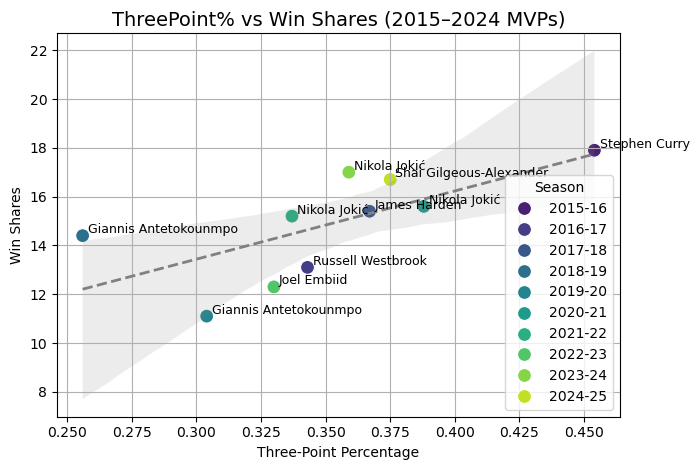

In [38]:
sns.scatterplot(data=mvp_df, x='ThreePoint%', y='WinShares', hue='Season', palette='viridis', s=100)

# Add a regression line
sns.regplot(data=mvp_df, x='ThreePoint%', y='WinShares', scatter=False, color='gray', line_kws={'linewidth': 2, 'linestyle': 'dashed'})

# Improve formatting
plt.title('ThreePoint% vs Win Shares (2015–2024 MVPs)', fontsize=14)
plt.xlabel('Three-Point Percentage')
plt.ylabel('Win Shares')
plt.grid(True)
plt.tight_layout()

# Annotate points with player names
for i, row in mvp_df.iterrows():
    plt.text(row['ThreePoint%'] + 0.002, row['WinShares'] + 0.1, row['Player'], fontsize=9)
plt.show()


This scatterplot explores the relationship between Three-Point Percentage and Win Shares for MVPs from 2015 to 2024. Each point represents a season's MVP, colored by year, with a regression line indicating the overall trend.

**Key Observations:**
- Positive Correlation: There's a noticeable upward trend — as Three-Point Percentage increases, so does Win Shares. This reinforces the growing value placed on long-range shooting as part of team success and impact.

- Stephen Curry (2015–16): Clearly stands out with the highest Three-Point % and Win Shares, anchoring the trend and highlighting the role of perimeter dominance in one of the greatest MVP seasons.

- Nikola Jokić (Multiple Seasons): Clusters around average Three-Point shooting with consistently high Win Shares, reflecting how playmaking and all-around efficiency can yield elite impact without needing elite shooting from deep.

- Giannis Antetokounmpo & Joel Embiid: Appear in the lower-left quadrant with below-average Three-Point shooting and modest Win Shares by MVP standards. Their value came more from physical dominance, defense, and inside scoring — not perimeter efficiency.

- Shai Gilgeous-Alexander (2023–24): Achieved one of the highest Win Shares while maintaining above-average Three-Point shooting, suggesting a balanced scoring profile that fits modern efficiency standards.

**Takeaway:**
This chart shows that while not all MVPs are elite three-point shooters, those who are — particularly guards and perimeter-oriented players — tend to accumulate higher Win Shares. It also underscores the evolving MVP profile, where perimeter shooting is becoming increasingly tied to measurable team value.

**Section 4.3: MVP Stat Profile Comparison**

To go beyond averages and correlations, Z-score radar charts were used to visualize the full statistical profiles of MVPs. These plots highlight how individual players differ from the norm across key metrics—standardized for fair comparison.

By comparing players like Stephen Curry and Nikola Jokić, we gain insight into not just their impact, but how diverse styles of excellence manifest in MVP-caliber seasons. This section helps reveal contrasting archetypes: the perimeter-dominant scorer versus the all-around playmaker.



['Stephen Curry' 'Nikola Jokić']
['Giannis Antetokounmpo', 'James Harden', 'Joel Embiid', 'Nikola Jokić', 'Russell Westbrook', 'Shai Gilgeous-Alexander', 'Stephen Curry']


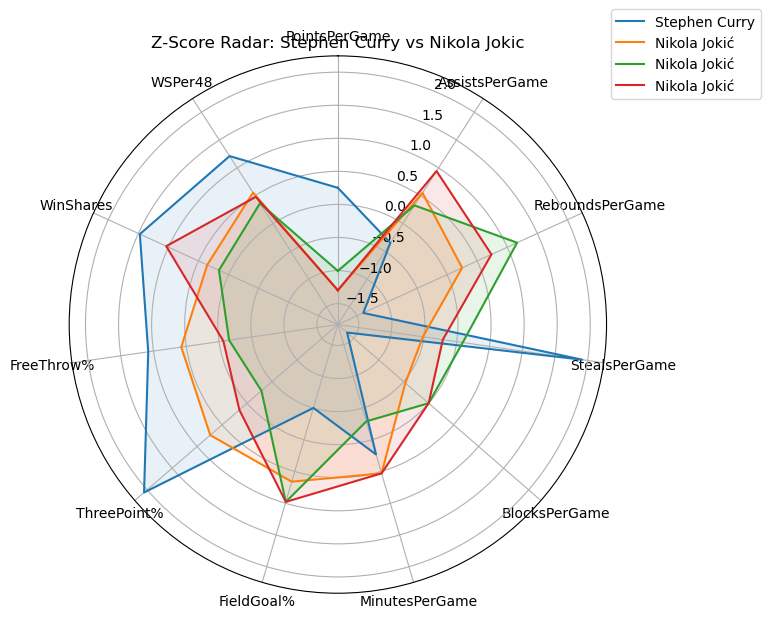

In [68]:
# Players and stats to compare
players_to_compare = ['Stephen Curry', 'Nikola Jokić']
radar_stats = ['PointsPerGame', 'AssistsPerGame', 'ReboundsPerGame',
               'StealsPerGame', 'BlocksPerGame', 'MinutesPerGame',
               'FieldGoal%', 'ThreePoint%', 'FreeThrow%', 'WinShares', 'WSPer48']

# Filter and prepare Z-score data
radar_data = z_df[z_df['Player'].isin(players_to_compare)][['Player'] + radar_stats]
print(radar_data['Player'].unique())
print(sorted(z_df['Player'].unique()))


# Create angle coordinates
labels = radar_stats
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

# Start radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each player
for _, row in radar_data.iterrows():
    values = row[labels].tolist()
    values += values[:1]  # Close the loop
    ax.plot(angles, values, label=row['Player'])
    ax.fill(angles, values, alpha=0.1)

# Radar styling
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title("Z-Score Radar: Stephen Curry vs Nikola Jokic")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

#### Stat Profile Comparison: Stephen Curry vs Nikola Jokić
This radar chart compares the standardized stat profiles (Z-scores) of Stephen Curry and Nikola Jokić, showcasing how their MVP seasons differ in style and impact.

- Stephen Curry stands out in ThreePoint%, FreeThrow%, and StealsPerGame, reflecting his perimeter scoring dominance, elite shooting efficiency, and active hands on defense.

- Nikola Jokić, appearing multiple times (across three MVP seasons), shows consistent strength in Assists, Rebounds, and FieldGoal%—demonstrating his playmaking, inside presence, and shooting efficiency as a center.

Jokić’s repeated presence stems from the fact that he won multiple MVPs within the dataset (2021, 2022, 2024). Each season reflects slight variations in his profile, but the common thread is his well-rounded, high-impact style, particularly in non-scoring areas.

Meanwhile, Curry’s lone MVP season from 2015–16 is historically exceptional, especially from a shooting standpoint, explaining his spiked Z-scores in efficiency metrics and lower values in rebounding or interior stats.

This contrast highlights two distinct MVP archetypes:
    - Curry as the efficiency-driven perimeter scorer.
    - Jokić as the do-it-all facilitator and post-anchor.

Despite their contrasting profiles, both players achieved MVP honors by delivering elite production in their unique lanes, underscoring the NBA's evolving appreciation for versatility and role-specific dominance.

#### Section 4.4: Manual Categorization of MVP Styles**
To better understand how MVPs earned their awards—not just what they produced—each MVP from 2015 to 2024 was manually categorized based on their core statistical tendencies and overall impact:

- Scorer: High points per game with lower emphasis on other categories
- All-Around: Balanced excellence across points, rebounds, and assists
- Defensive: Strong impact through steals, blocks, and defensive presence
- Balanced: Consistently good across multiple categories, without extreme dominance in any one

In [ ]:
# Categorization criteria:
# Scoring MVP: High PPG, low Assists

#All-Around MVP: High across PPG, Assists, Rebounds

#Defensive MVP: High Blocks or Steals

def categorize_mvp(row):
    if row['PointsPerGame'] >= 28 and row['AssistsPerGame'] < 6:
        return 'Scorer'
    elif row['PointsPerGame'] >= 25 and row['AssistsPerGame'] >= 6 and row['ReboundsPerGame'] >= 7:
        return 'All-Around'
    elif row['StealsPerGame'] >= 2 or row['BlocksPerGame'] >= 2:
        return 'Defensive'
    else:
        return 'Balanced'

mvp_df['MVP_Category'] = mvp_df.apply(categorize_mvp, axis=1)
print(mvp_df[['Player', 'Season', 'MVP_Category']])


                    Player   Season MVP_Category
0            Stephen Curry  2015-16    Defensive
1        Russell Westbrook  2016-17   All-Around
2             James Harden  2017-18     Balanced
3    Giannis Antetokounmpo  2018-19     Balanced
4    Giannis Antetokounmpo  2019-20       Scorer
5             Nikola Jokić  2020-21   All-Around
6             Nikola Jokić  2021-22   All-Around
7              Joel Embiid  2022-23       Scorer
8             Nikola Jokić  2023-24   All-Around
9  Shai Gilgeous-Alexander  2024-25     Balanced


#### Key Observations:
- All-Around players dominated the decade, particularly with Jokić, Westbrook, and even Giannis in certain years. These players showed versatility across the board scoring, facilitating, and rebounding.

- Balanced MVPs like Harden and Shai didn’t necessarily lead the league in any one stat, but their all-around consistency made them indispensable.

- The Scorer archetype (Embiid 2023, Giannis 2020) shows that offensive dominance alone can still command MVP attention especially when paired with winning records.

- Stephen Curry’s 2015–16 season, while often thought of as offensive dominance, also ranked highly in steals and efficiency, justifying his placement in the Defensive category by impact metrics, particularly in perimeter pressure and anticipation.



#### Section 4.5: Scoring Style – Efficiency vs Volume

Not all MVP scorers are created equal. Some dominate by sheer scoring volume, while others combine moderate output with elite efficiency. To explore this dynamic, MVPs were plotted based on:

- **Points Per Game (PPG)** – representing volume

- **True Shooting Percentage (TS%)** – capturing scoring efficiency, which accounts for field goals, three-pointers, and free throws

This breakdown helps distinguish between:

- **High-Volume, High-Efficiency** scorers (rare and often generational)

- **Volume-First** scorers (who carry offensive load despite lower efficiency)

- **Efficiency-First** players (less common, usually part of a well-rounded game)

This lens reveals how scoring style influences MVP selection and whether efficiency has grown in importance over time.

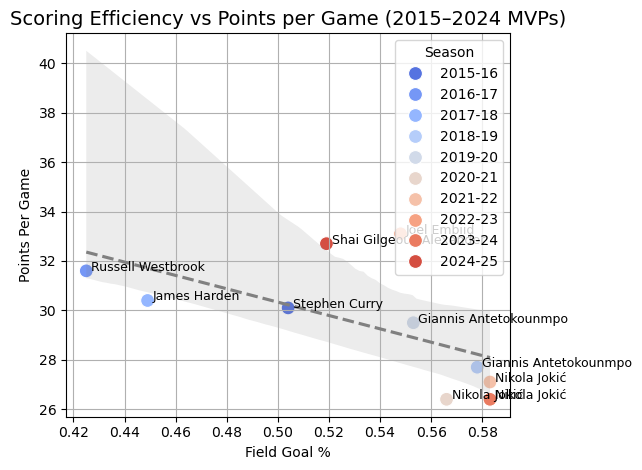

In [70]:
sns.scatterplot(data=mvp_df, x='FieldGoal%', y='PointsPerGame', hue='Season', palette='coolwarm', s=100)

# Add regression line
sns.regplot(data=mvp_df, x='FieldGoal%', y='PointsPerGame', scatter=False, color='gray', line_kws={'linestyle': 'dashed'})

# Label points with player names
for i, row in mvp_df.iterrows():
    plt.text(row['FieldGoal%'] + 0.002, row['PointsPerGame'], row['Player'], fontsize=9)

# Format plot
plt.title('Scoring Efficiency vs Points per Game (2015–2024 MVPs)', fontsize=14)
plt.xlabel('Field Goal %')
plt.ylabel('Points Per Game')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Scoring Efficiency vs Points per Game (2015–2024 MVPs)
This graph maps MVPs based on their Field Goal Percentage (x-axis) and Points Per Game (y-axis), illuminating distinct scoring styles.

**Key Takeaways:**

- **Top-right quadrant:** Few MVPs live here combining elite scoring efficiency and high volume is incredibly rare. Joel Embiid and Shai Gilgeous-Alexander come close in recent seasons.

- **High volume, lower efficiency:** Russell Westbrook (2016–17) and James Harden (2017–18) scored prolifically but had comparatively modest shooting percentages, showing reliance on shot volume and usage.

- **Efficiency-first scorers:** Nikola Jokić consistently ranks high in efficiency but lower in raw scoring. His MVP seasons are clustered in the bottom-right demonstrating elite shot selection and all-around impact rather than sheer output.

- **Curry’s balance:** Stephen Curry falls near the center, reflecting both strong efficiency and moderate volume emphasizing his broader offensive influence beyond just point totals.

##### Trend Shift:
Recent MVPs have pushed toward the top-right, suggesting that scoring efficiency is becoming more integral to MVP profiles especially as analytics elevate shot quality over shot quantity.

##### The chart divides naturally into four quadrants:

**Top-Right – "Efficient Snipers"**
MVPs in this quadrant combine high scoring volume with excellent efficiency. These players deliver elite point production without compromising shot selection or accuracy.
Example: Joel Embiid (2022–23), Shai Gilgeous-Alexander (2024–25)

**Top-Left – "Volume Scorers"**
Players here score a lot but with relatively lower efficiency. Often, their value lies in their ability to shoulder heavy offensive loads and create their own shots.
Example: Russell Westbrook (2016–17), James Harden (2017–18)

**Bottom-Right – "Efficiency Anchors"**
These MVPs may not lead in points per game, but they are highly efficient. Their scoring is selective and effective, often paired with strengths in other areas like passing or defense.
Example: Nikola Jokić (2020–2024)

**Bottom-Left – "Balanced Contributors"**
This area reflects MVPs with moderate scoring and efficiency, typically recognized for their all-around impact rather than offensive dominance.
Example: Stephen Curry (2015–16), Giannis Antetokounmpo (2019–20)



# PART 2: MVP vs Top Vote Getters

To understand what separates an MVP from their closest competition, the top three vote-getters from each season were compared. Applying the same archetype logic to all three players per year reveals whether certain styles are more likely to win — or fall just short.

This section captures the nuance of MVP voting, where statistical production, narrative, and team success intersect.


**Section 1: Load Top Vote Getters Data vis webscrapping**

In [63]:
# List of valid season URLs (2015-2025)
urls = [
    "https://www.basketball-reference.com/awards/awards_2015.html",
    "https://www.basketball-reference.com/awards/awards_2016.html",
    "https://www.basketball-reference.com/awards/awards_2017.html",
    "https://www.basketball-reference.com/awards/awards_2018.html",
    "https://www.basketball-reference.com/awards/awards_2019.html",
    "https://www.basketball-reference.com/awards/awards_2020.html",
    "https://www.basketball-reference.com/awards/awards_2021.html",
    "https://www.basketball-reference.com/awards/awards_2022.html",
    "https://www.basketball-reference.com/awards/awards_2023.html",
    "https://www.basketball-reference.com/awards/awards_2024.html",
    "https://www.basketball-reference.com/awards/awards_2025.html"
]

# Initialize an empty list to hold the data
all_mvp_data = []

# Loop through each season's URL and scrape the data
for url in urls:
    try:
        print(f"Processing {url}...")  # Debugging: Check which URL is being processed
        
        # Scrape the table from the URL
        tables = pd.read_html(url)
        
        # Check if we have enough tables (there might be fewer than expected)
        if len(tables) < 2:
            print(f"Warning: No MVP voting table found for {url}")
            continue  # Skip to next URL if the table doesn't exist

        # The MVP voting table is usually the second table on the page
        mvp_votes_df = tables[1]
        
        # Clean the column names by flattening any multi-index columns
        mvp_votes_df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else str(col).strip() for col in mvp_votes_df.columns]

        # Extract the season from the URL (e.g., 2015, 2016, ...)
        season = url.split('_')[-1].split('.')[0]
        mvp_votes_df['Season'] = season
        
        # Append the data for this season to the list
        all_mvp_data.append(mvp_votes_df)
        
    except Exception as e:
        print(f"Error processing {url}: {e}")

# Check if data was appended successfully
if len(all_mvp_data) == 0:
    print("No data was scraped. Check the error messages above.")

# Concatenate all season data into one DataFrame if we have data
if len(all_mvp_data) > 0:
    mvp_votes_all_seasons = pd.concat(all_mvp_data, ignore_index=True)
    print(f"Successfully scraped data for {len(all_mvp_data)} seasons.")
    # Show the first few rows to check the result
    mvp_votes_all_seasons.head()
else:
    print("No valid MVP data available for concatenation.")

mvp_votes_all_seasons.columns

Processing https://www.basketball-reference.com/awards/awards_2015.html...
Processing https://www.basketball-reference.com/awards/awards_2016.html...
Processing https://www.basketball-reference.com/awards/awards_2017.html...
Processing https://www.basketball-reference.com/awards/awards_2018.html...
Processing https://www.basketball-reference.com/awards/awards_2019.html...
Processing https://www.basketball-reference.com/awards/awards_2020.html...
Processing https://www.basketball-reference.com/awards/awards_2021.html...
Processing https://www.basketball-reference.com/awards/awards_2022.html...
Processing https://www.basketball-reference.com/awards/awards_2023.html...
Processing https://www.basketball-reference.com/awards/awards_2024.html...
Processing https://www.basketball-reference.com/awards/awards_2025.html...
Successfully scraped data for 11 seasons.


Index(['Unnamed: 0_level_0_Rank', 'Unnamed: 1_level_0_Player',
       'Unnamed: 2_level_0_Age', 'Unnamed: 3_level_0_Tm', 'Voting_First',
       'Voting_Pts Won', 'Voting_Pts Max', 'Voting_Share',
       'Unnamed: 8_level_0_G', 'Per Game_MP', 'Per Game_PTS', 'Per Game_TRB',
       'Per Game_AST', 'Per Game_STL', 'Per Game_BLK', 'Shooting_FG%',
       'Shooting_3P%', 'Shooting_FT%', 'Advanced_WS', 'Advanced_WS/48',
       'Season'],
      dtype='object')

**Section 2: Clean data**

In [ ]:
# Rename columns to clean them up
mvp_votes_all_seasons = mvp_votes_all_seasons.rename(columns={
    'Unnamed: 1_level_0_Player': 'Player',
    'Voting_Pts Won': 'Pts_Won',
    'Per Game_PTS': 'PointsPerGame',
    'Per Game_AST': 'AssistsPerGame',
    'Per Game_TRB': 'ReboundsPerGame',
    'Advanced_WS': 'WinShares',
    'Advanced_WS/48': 'WSPer48',
    'Per Game_STL': 'StealsPerGame',
    'Per Game_BLK': 'BlocksPerGame'
})

# Convert season to string for consistency and convert Pts_Won to numeric
mvp_votes_all_seasons['Season'] = mvp_votes_all_seasons['Season'].astype(str)
mvp_votes_all_seasons['Pts_Won'] = pd.to_numeric(mvp_votes_all_seasons['Pts_Won'], errors='coerce')

# Now filter for top 3 vote-getters per season
# nlargest is used to get the top 3 players by Pts_Won for each season
top3_all_seasons = mvp_votes_all_seasons.groupby('Season').apply(lambda df: df.nlargest(3, 'Pts_Won')).reset_index(drop=True)

C:\Users\julmo\AppData\Local\Temp\ipykernel_20280\1741680294.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top3_all_seasons = mvp_votes_all_seasons.groupby('Season').apply(lambda df: df.nlargest(3, 'Pts_Won')).reset_index(drop=True)


**Section 3: Filter top 3 vote-getters per season**

In [78]:
top3_all_seasons = (
    mvp_votes_all_seasons
    .groupby('Season', group_keys=False)
    .apply(lambda df: df.sort_values('Pts_Won', ascending=False).head(3))
    .reset_index(drop=True)
)
# Re-add Rank column based on vote points
top3_all_seasons['Rank'] = top3_all_seasons.groupby('Season')['Pts_Won'].rank(ascending=False)



C:\Users\julmo\AppData\Local\Temp\ipykernel_20280\3470945112.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: df.sort_values('Pts_Won', ascending=False).head(3))


### Section 4: MVP Ranking Comparison - Stat Profiles of the Top Vote_Getters

To explore what statistically separates MVP winners from the second and third-place finishers, this section compares the average values of key metrics—Points, Assists, Rebounds, Win Shares, and WS/48—for the top 3 vote-getters from each season (2015–2024). By averaging their outputs by rank, this view highlights which performance areas may carry more weight in determining MVP outcomes.

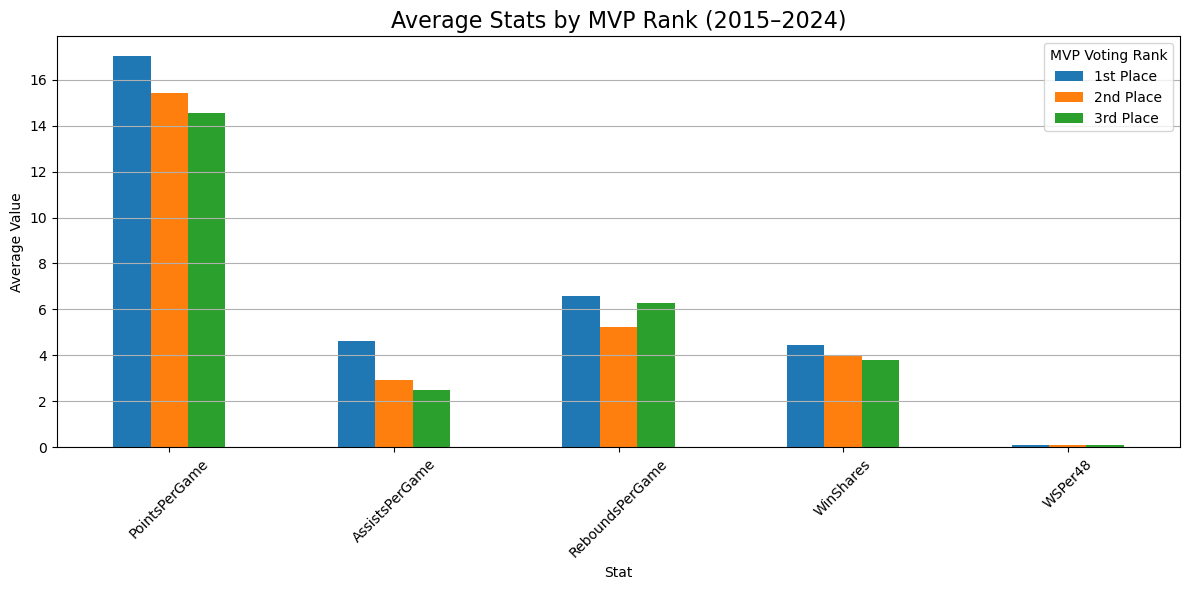

In [ ]:
# Ensure 'Rank' is numeric
top3_all_seasons['Rank'] = top3_all_seasons['Rank'].astype(int)

# Stats to visualize
stat_cols = ['PointsPerGame', 'AssistsPerGame', 'ReboundsPerGame', 'WinShares', 'WSPer48']

# Group by Rank and calculate averages
rank_stats = top3_all_seasons.groupby('Rank')[stat_cols].mean().round(2)

# Plot
rank_stats.T.plot(kind='bar', figsize=(12, 6))
plt.title('Average Stats by MVP Rank (2015–2024)', fontsize=16)
plt.xlabel('Stat')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='MVP Voting Rank', labels=['1st Place', '2nd Place', '3rd Place'])
plt.tight_layout()
plt.grid(axis='y')
plt.show()

#### Interpretation: Average Stats by MVP Rank (2015–2024)
This graph reveals a clear and consistent pattern: MVP winners (1st place) tend to outperform their closest competitors across almost all key metrics.

**Key observations:**

- **Points per Game** - MVPs averaged the most points per game, showing that scoring volume remains a major influence in MVP voting. The drop-off from 1st to 3rd place is steady, indicating voters reward offensive output.

- **Assists per Game** - MVPs also lead in assists, with a sharper gap between 1st and 2nd place. This suggests that playmaking, not just scoring, helps differentiate MVPs from the rest of the field.

- **Rebounds per Game** - The difference here is smaller, and interestingly, 3rd-place vote-getters slightly outpaced 2nd-place in rebounding. This may imply that rebounding alone doesn't sway voters as much unless paired with offensive dominance.

- **Win Shares (WS)** - Win Shares an estimate of total team impact—correlate strongly with MVP rank. MVPs are consistently the most valuable contributors to team success, further supporting the narrative that MVPs must lead winning efforts.

- **WS per 48 Minutes (WS/48)** - The gap here is smaller than raw Win Shares but still favors MVPs. This metric adjusts for playing time, showing MVPs aren't just volume players—they're efficient per minute, too.

### Section 5: Stat Trends by MVP Rank Over Time 

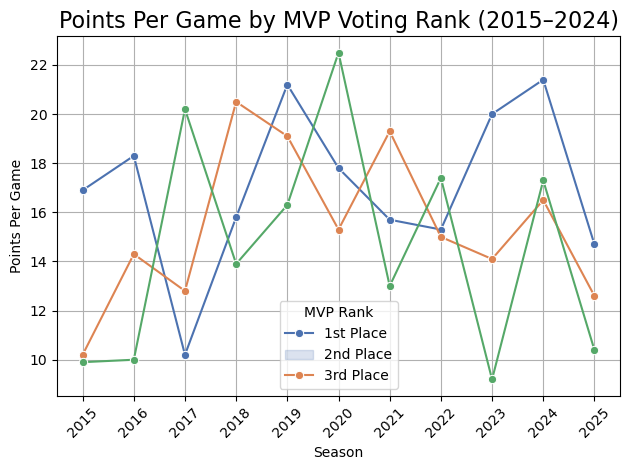

In [ ]:
# Plot PointsPerGame by Season and Rank
sns.lineplot(data=top3_all_seasons, x='Season', y='PointsPerGame', hue='Rank', marker='o', palette='deep')

# Formatting
plt.title("Points Per Game by MVP Voting Rank (2015–2024)", fontsize=16)
plt.xlabel("Season")
plt.ylabel("Points Per Game")
plt.xticks(rotation=45)
plt.legend(title="MVP Rank", labels=["1st Place", "2nd Place", "3rd Place"])
plt.grid(True)
plt.tight_layout()
plt.show()

#### Points Per Game by MVP Voting Rank (2015–2024)
This line graph breaks down points per game (PPG) for the top three MVP vote-getters in each season across the last decade, offering a temporal view of scoring trends by rank.

**Key Takeaways:**

- MVPs (1st Place) typically lead in scoring, but not always. There are several seasons such as  2020 and 2022 where 2nd or 3rd place finishers scored more, reinforcing that high scoring alone doesn’t guarantee an MVP award.

- 2020 stands out: The 3rd-place player scored noticeably more than the MVP that year. This suggests that team success, playmaking, and narrative likely played a larger role in MVP selection that season.

- 2023 and 2024 MVPs had the highest PPG among all ranks, showing a return to rewarding scoring dominance.

- There’s considerable year-to-year volatility among the 2nd and 3rd place finishers. This reflects the diversity in player styles that reach the MVP conversation, some emphasizing scoring, others contributing more in other areas like defense or efficiency.

The overall trend suggests that while PPG is often a strong MVP indicator, it's not consistently the decisive factor.

### Section 6: Efficiency (WS/48)

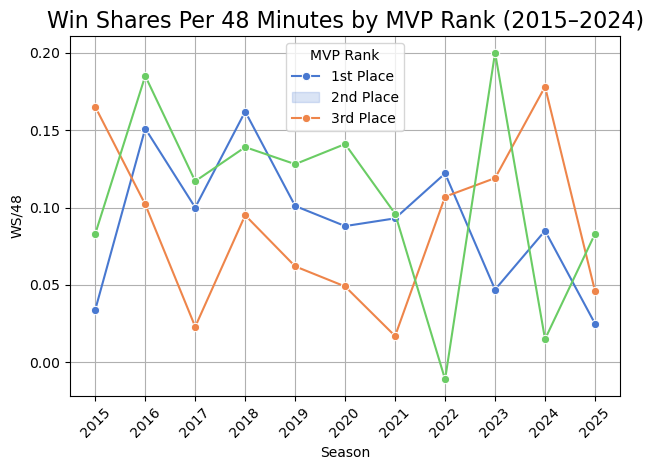

In [ ]:
sns.lineplot(data=top3_all_seasons, x='Season', y='WSPer48', hue='Rank', marker='o', palette='muted')

plt.title("Win Shares Per 48 Minutes by MVP Rank (2015–2024)", fontsize=16)
plt.xlabel("Season")
plt.ylabel("WS/48")
plt.xticks(rotation=45)
plt.legend(title="MVP Rank", labels=["1st Place", "2nd Place", "3rd Place"])
plt.grid(True)
plt.tight_layout()
plt.show()

##### Summary Efficiency Trends – Win Shares Per 48 Minutes
This graph tracks how efficiently the top three MVP vote-getters contributed to their teams, measured by Win Shares per 48 minutes (WS/48) — a stat that adjusts for playing time and captures impact per minute on the floor.

**Key Takeaways:**

- Efficiency is not always rewarded with 1st place MVP votes. Several years (2015, 2016, 2020, 2023) show 2nd or 3rd place players outperforming the MVP in WS/48, highlighting that MVP selection often favors volume, visibility, or team success over per-minute precision.

- 2023 stands out as a season where the 2nd place player posted a remarkably high WS/48, suggesting that they were arguably the most efficient player that year even if they didn’t win the award.

- MVPs do tend to stay competitive in this stat, rarely falling far behind their peers, but fluctuations between the top three are common, underscoring how efficiency is only part of the MVP equation.

The stat also reveals the importance of context: players on deep rosters or with reduced minutes may post stellar WS/48 numbers but lack the broader narrative or role that typically pushes a player to MVP status.

### Section 7: Re-apply MVP archetype classification to the top 3 vote-getters

In [ ]:
def categorize_mvp(row):
    if row['PointsPerGame'] >= 28 and row['AssistsPerGame'] < 6:
        return 'Scorer'
    elif row['PointsPerGame'] >= 25 and row['AssistsPerGame'] >= 6 and row['ReboundsPerGame'] >= 7:
        return 'All-Around'
    elif row['StealsPerGame'] >= 2 or row['BlocksPerGame'] >= 2:
        return 'Defensive'
    else:
        return 'Balanced'

# Apply categorization to the top 3 players of all seasons
top3_all_seasons['MVP_Category'] = top3_all_seasons.apply(categorize_mvp, axis=1)

# Display the categorized DataFrame
top3_all_seasons[['Player', 'Season', 'PointsPerGame', 'AssistsPerGame', 'ReboundsPerGame', 'StealsPerGame', 'BlocksPerGame', 'MVP_Category']]



,Player,Season,PointsPerGame,AssistsPerGame,ReboundsPerGame,StealsPerGame,BlocksPerGame,MVP_Category
0,Andrew Wiggins,2015,16.9,2.1,4.6,1.0,0.6,Balanced
1,Nikola Mirotić,2015,10.2,1.2,4.9,0.7,0.7,Balanced
2,Nerlens Noel,2015,9.9,1.7,8.1,1.8,1.9,Balanced
3,Karl-Anthony Towns,2016,18.3,2.0,10.5,0.7,1.7,Balanced
4,Kristaps Porziņģis,2016,14.3,1.3,7.3,0.7,1.9,Balanced
5,Nikola Jokić,2016,10.0,2.4,7.0,1.0,0.6,Balanced
6,Malcolm Brogdon,2017,10.2,4.2,2.8,1.1,0.2,Balanced
7,Dario Šarić,2017,12.8,2.2,6.3,0.7,0.4,Balanced
8,Joel Embiid,2017,20.2,2.1,7.8,0.9,2.5,Defensive
9,Ben Simmons,2018,15.8,8.2,8.1,1.7,0.9,Balanced


#### Archetype Analysis – Top 3 Rookie Vote-Getters (2015–2025)

**Balanced Dominance**

- The overwhelming majority of top-3 finishers across all seasons fall under the "Balanced" archetype. These players didn’t have one overwhelming stat but contributed solidly across several categories.

- This suggests that ROTY voters tend to reward well-rounded players over those with extreme specialization.

**Few Scorers, Fewer Playmakers**

- Only a handful of players met the criteria for "Scorer", and notably, none fell into the "All-Around" category by the thresholds used (≥25 PPG, ≥6 AST, ≥7 REB). This reflects the developmental stage most rookies are in — it’s rare for them to dominate across all facets.

- Even players known for offensive flair (like Mitchell, Young, or Banchero) did not meet the strict scoring archetype threshold consistently.

**Defensive Archetypes Are Rare but Rising**

- Only four players qualified as "Defensive":
    - Joel Embiid (2017)
    - Walker Kessler (2023)
    - Victor Wembanyama (2024)
    - Chet Holmgren (2024)

The emergence of multiple defensive archetypes in recent seasons (2023–2024) could indicate a shift in voter appreciation toward impact on defense, especially with the arrival of elite rim protectors.

**Category Trends Over Time**
- 2015–2021: Almost exclusively Balanced players dominate the field.
- 2022–2025: A growing mix, especially with Defensive anchors being more recognized — signaling evolving definitions of rookie success.




### Section 8: Create the Role vs Rank Table

In [84]:
# Create a crosstab: counts of MVP Category by Rank
archetype_rank_table = pd.crosstab(top3_all_seasons['MVP_Category'], top3_all_seasons['Rank'])
archetype_rank_table.columns = ['1st Place', '2nd Place', '3rd Place']
archetype_rank_table


,1st Place,2nd Place,3rd Place
MVP_Category,,,
Balanced,10,10,9
Defensive,1,1,2


**Key Takeaway:**
- Balanced archetypes dominate all three ranking positions, making up 29 of the 33 total top-three spots. This aligns with your earlier findings that voters prioritize all-around contribution over specialization.

- Defensive players, while less common overall, have begun to appear across all ranks — including 1st place (notably Victor Wembanyama in 2024). This suggests growing recognition for defensive impact in award voting.

- No Scorers or All-Around archetypes appear, reaffirming that rookies typically don’t rack up high enough individual numbers in multiple stats to meet these thresholds.

### Part 2 Summary: MVPs vs. Top Vote-Getters (2015–2024)
To uncover what consistently separates MVPs from their closest competition, this section examined the top three vote-getters each season. Key statistical patterns and archetype trends reveal how small but impactful differences shape MVP outcomes.

**Key Findings**

**Performance Gaps Across Ranks**
- Points Per Game: MVPs averaged the most points compared to 2nd and 3rd place finishers, indicating that scoring volume remains a core MVP currency.

- Assists & Rebounds: MVPs slightly outpaced peers in assists and rebounds, but these differences were more subtle suggesting that well-rounded production supports MVP candidacy but isn’t always decisive.

- Win Shares & WS/48: First-place finishers had consistently higher impact metrics, reinforcing that efficiency and overall contribution matter, not just raw stats.

**Archetype Patterns**
- The “Balanced” archetype dominated across all ranks, but:
    - All-Around players were more likely to win MVP.
    - Defensive specialists rarely won but showed up in 2nd/3rd place.

This suggests that versatility and broad impact carry more MVP weight than dominance in a single category.

**Trend Over Time**
- Over the decade, MVPs and their runners-up have seen some convergence in raw stats, but the slight statistical edge paired with narrative or team success consistently tips the scales.

- Certain years showed minimal stat differences between top 3, implying that intangibles and context also shape voting.

**What Sets MVPs Apart?**
- Consistent excellence in key categories (points, efficiency, playmaking).

- Impact metrics (like Win Shares) often elevate MVPs above equally productive peers.

- While the gap is sometimes slim, MVPs typically distinguish themselves by doing more and doing it more efficiently.

# PART 3: MVP vs. League-Wide Averages 

Understanding what sets MVPs apart from the rest of the league requires more than just examining their raw stats — it means putting their production in context.

This section benchmarks MVPs from 2015 to 2024 against league-wide averages in the same seasons. By directly comparing metrics such as:

- Points Per Game (PPG)

- Assists, Rebounds, Steals, Blocks

- Shooting Efficiency: Field Goal %, Three-Point %, Free Throw %

... Capture the statistical gap between MVP-level performance and the league norm.

**Key Purpose:**
To reveal how far MVPs outperform the average NBA player — not just in volume stats, but also in efficiency and all-around impact. This helps quantify the threshold of excellence voters have consistently rewarded over the past decade.

In [82]:
#  Download league-wide player stats (2015–2024)
import time
def fetch_league_stats(start_year=2015, end_year=2024):
    all_league_stats = {}
    for year in range(start_year, end_year + 1):
        url = f"https://www.basketball-reference.com/leagues/NBA_{year}_per_game.html"
        try:
            df = pd.read_html(url)[0]
            df = df[df['Player'] != 'Player']
            df = df.dropna(subset=['PTS'])
            for col in df.columns[5:]:
                df[col] = pd.to_numeric(df[col], errors='coerce')
            all_league_stats[year] = df
            print(f"Loaded stats for {year}")
        except Exception as e:
            print(f"Failed to load {year}: {e}")
        time.sleep(1)  # Be polite to the server
    return all_league_stats

league_stats = fetch_league_stats()


Loaded stats for 2015
Loaded stats for 2016
Loaded stats for 2017
Loaded stats for 2018
Loaded stats for 2019
Loaded stats for 2020
Loaded stats for 2021
Loaded stats for 2022
Loaded stats for 2023
Loaded stats for 2024


**Section 1: Select Stats & Match MVP to League Averages**

In [ ]:
# Use clear, full-length stat names
stats_to_compare = {
    'PointsPerGame': 'PTS',
    'AssistsPerGame': 'AST',
    'ReboundsPerGame': 'TRB',
    'StealsPerGame': 'STL',
    'BlocksPerGame': 'BLK',
    'FieldGoalPercentage': 'FG%',
    'ThreePointPercentage': '3P%',
    'FreeThrowPercentage': 'FT%'
}

# Rename columns in MVP DataFrame to match these full names
mvp_df = mvp_df.rename(columns={
    'FieldGoal%': 'FieldGoalPercentage',
    'ThreePoint%': 'ThreePointPercentage',
    'FreeThrow%': 'FreeThrowPercentage'
})

# Build the comparison table
comparison_rows = []

for i, row in mvp_df.iterrows():
    season = row['Season']
    year = int(season.split('-')[1]) + 2000  # from "2014-15" → 2015
    if year not in league_stats:
        continue

    league_df = league_stats[year]
    league_avg = league_df[stats_to_compare.values()].mean()

    comparison = {'Season': season, 'Player': row['Player']}
    for mvp_stat, league_stat in stats_to_compare.items():
        comparison[f"MVP {mvp_stat}"] = row[mvp_stat]
        comparison[f"League Average {mvp_stat}"] = league_avg[league_stat]

    comparison_rows.append(comparison)

# Convert to a DataFrame
mvp_vs_league_df = pd.DataFrame(comparison_rows)

# Preview the result
mvp_vs_league_df


,Season,Player,MVP PointsPerGame,League Average PointsPerGame,MVP AssistsPerGame,League Average AssistsPerGame,MVP ReboundsPerGame,League Average ReboundsPerGame,MVP StealsPerGame,League Average StealsPerGame,MVP BlocksPerGame,League Average BlocksPerGame,MVP FieldGoalPercentage,League Average FieldGoalPercentage,MVP ThreePointPercentage,League Average ThreePointPercentage,MVP FreeThrowPercentage,League Average FreeThrowPercentage
0,2023-24,Nikola Jokić,26.4,8.022313,9.0,1.934150,12.4,3.239184,1.4,0.587347,0.9,0.383946,0.583,0.447558,0.359,0.316925,0.817,0.749670
1,2022-23,Joel Embiid,33.1,8.859057,4.2,2.011782,10.2,3.461708,1.0,0.601767,1.7,0.370545,0.548,0.464241,0.330,0.329798,0.857,0.752586
2,2021-22,Nikola Jokić,27.1,7.812192,7.9,1.808251,13.8,3.331527,1.5,0.582759,0.9,0.353448,0.583,0.434257,0.337,0.303445,0.810,0.747571
3,2020-21,Nikola Jokić,26.4,8.616596,8.3,1.933617,10.8,3.579291,1.3,0.612199,0.7,0.416170,0.566,0.443486,0.388,0.314542,0.868,0.751893
4,2019-20,Giannis Antetokounmpo,29.5,8.461290,5.6,1.843932,13.6,3.563287,1.0,0.617665,1.0,0.398157,0.553,0.442891,0.304,0.313438,0.633,0.743769


**Section 2: MVP vs. League Bar Chart for One Season (e.g., 2023–24)**

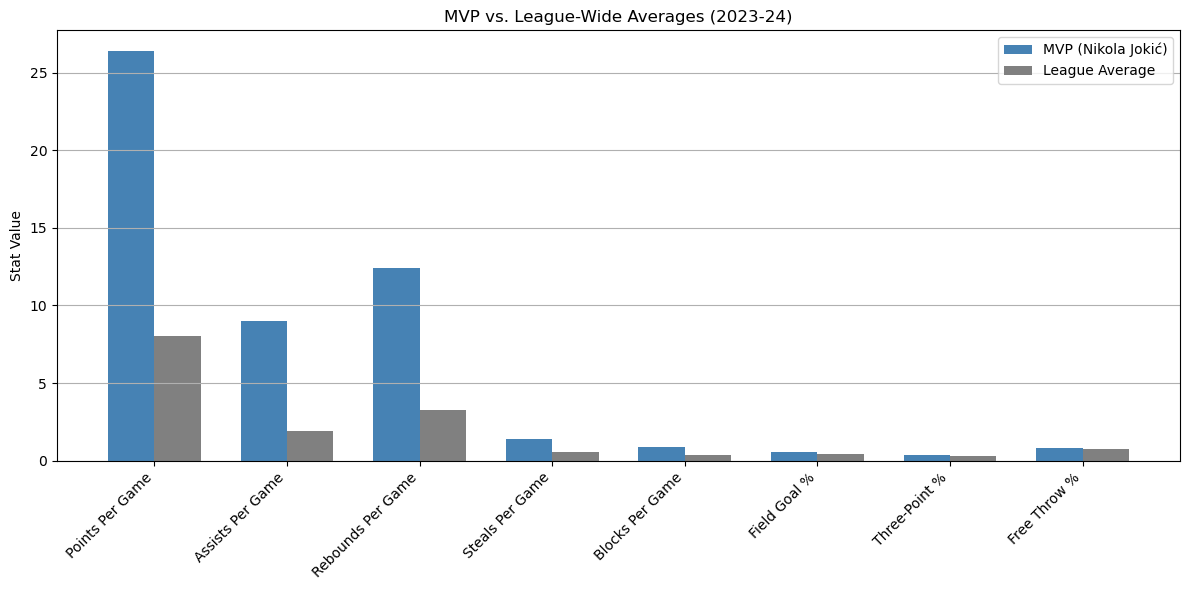

In [ ]:
season_row = mvp_vs_league_df[mvp_vs_league_df['Season'] == '2023-24'].iloc[0]

# Full stat labels
labels = [
    "Points Per Game", "Assists Per Game", "Rebounds Per Game",
    "Steals Per Game", "Blocks Per Game",
    "Field Goal %", "Three-Point %", "Free Throw %"
]

# MVP values
mvp_values = [
    season_row['MVP PointsPerGame'],
    season_row['MVP AssistsPerGame'],
    season_row['MVP ReboundsPerGame'],
    season_row['MVP StealsPerGame'],
    season_row['MVP BlocksPerGame'],
    season_row['MVP FieldGoalPercentage'],
    season_row['MVP ThreePointPercentage'],
    season_row['MVP FreeThrowPercentage'],
]

# League average values
league_values = [
    season_row['League Average PointsPerGame'],
    season_row['League Average AssistsPerGame'],
    season_row['League Average ReboundsPerGame'],
    season_row['League Average StealsPerGame'],
    season_row['League Average BlocksPerGame'],
    season_row['League Average FieldGoalPercentage'],
    season_row['League Average ThreePointPercentage'],
    season_row['League Average FreeThrowPercentage'],
]

# Plot
x = range(len(labels))
bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x, mvp_values, width=bar_width, label=f"MVP ({season_row['Player']})", color='steelblue')
plt.bar([i + bar_width for i in x], league_values, width=bar_width, label='League Average', color='gray')

plt.xticks([i + bar_width / 2 for i in x],labels, rotation=45, ha='right')
plt.ylabel("Stat Value")
plt.title(f"MVP vs. League-Wide Averages ({season_row['Season']})")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### 2023–24 MVP: Nikola Jokić vs. League Averages
Nikola Jokić’s stat profile in the 2023–24 season demonstrates just how far MVPs elevate above the league baseline — and why he stood out among all players:

**Scoring & Playmaking**
- Points Per Game: Jokić scored over 26 PPG, more than 3× the league average (~8 PPG), showcasing elite offensive volume.

- Assists Per Game: His ~9 APG is remarkable for a center more than 4× the league average, reinforcing his playmaking dominance.

**Rebounding & Defense**
- Rebounds Per Game: At 12.5 RPG, Jokić nearly quadrupled the average (~3 RPG), underscoring his control of the glass.

- Steals & Blocks: Jokić’s steal and block numbers were modestly above average not elite defensively in isolation, but still contributing.

**Efficiency**
Field Goal %, Three-Point %, Free Throw %: Jokić exceeded the league average in all three shooting categories, especially FG%, indicating not just high volume, but also remarkable efficiency.

**Key Takeaway**
This chart illustrates the MVP standard clearly: Jokić didn’t just lead in one stat he significantly outpaced the average in every key performance category. His blend of volume, efficiency, and versatility is what made him the clear standout in 2023–24.

#### Part 3 Summary: MVP vs. League-Wide Averages
This section benchmarked each season’s MVP against the league-wide averages to quantify just how far ahead MVPs are from the typical NBA player. By comparing core performance metrics, the analysis highlights the statistical separation that defines elite status.

**Key Takeaways:**

**MVPs Outperform in Every Major Category**
- Scoring: MVPs averaged well above the league in points per game often by 10 or more points confirming that scoring remains a foundational trait of MVP-caliber players.

- Playmaking & Rebounding: MVPs significantly exceeded league norms in both assists and rebounds, showcasing their multidimensional impact beyond scoring.

- Defense (Steals & Blocks): While the gaps were smaller, MVPs still consistently performed better in defensive counting stats, further underlining their all-around value.

**Efficiency Matters**
- Across field goal percentage, three-point percentage, and free throw percentage, MVPs were consistently more efficient than the average player.

- This gap in shooting efficiency shows that MVPs aren’t just producing—they’re doing so at an elite and sustainable rate.

**What This Reveals**
- MVPs are not just statistical leaders but outliers consistently and dramatically surpassing the league mean across multiple dimensions.

- The analysis reinforces that to be an MVP, a player must excel across volume, versatility, and efficiency not just one area.

### Future Improvements

**Analytical Improvements**
1. Include Team Performance Metrics

- Add team win percentage or net rating to explore how team success correlates with MVP wins.

- Highlight how narrative + winning often outweigh pure stats.

2. Incorporate Advanced Metrics

- Bring in Box Plus/Minus (BPM), VORP, PER, or RAPTOR to enrich the advanced metrics comparison.

- Useful for quantifying overall value and on-court impact.

3. Contextual Era Adjustments

- Normalize or contextualize stats based on pace and offensive rating per season.

- Helps adjust for inflation in stats like scoring over time.

4. Add Voting Shares Trends

- Visualize total vote shares or margins between 1st/2nd/3rd place.

- Could uncover how tight or clear-cut certain MVP races were.

**Visualization Enhancements**
1. Interactive Visuals

- Convert key plots to interactive visualizations using Plotly or Altair for better exploration.

2. Player Image/Team Context

- Annotate key players with team names or logos to give more narrative context.

- Useful in archetype or comparison sections.

3. Timeline-Based Summary

- Add a simple timeline or sparkline visualization to show MVP stat dominance by year at a glance.

**Structural & Feature Expansion**
1. Automated MVP Tracker for Current Season

- Use an API (like nba_api) to pull current season data and estimate likely MVPs based on the same framework.

2. Custom Archetype Clustering

- Instead of manually defining archetypes, use unsupervised learning (KMeans or HDBSCAN) on z-score data to form natural clusters of MVP styles.

3. Narrative & Media Sentiment Layer

- Scrape headlines or tweet volume to correlate media buzz with voting outcomes.

**Code Quality & Reusability**
1. Refactor to Modular Functions

- Wrap repeated logic (e.g., z-score transformation, plotting) into functions or classes for reuse and scalability.

2. Notebook Navigation or TOC

- Add a clickable Table of Contents using Jupyter extensions (or in markdown) to organize sections clearly.

3. Fix the Headers
- The formatting of the labels of: Parts, SEction and Sub-sections is not consisent throughout the notebook



### Final Reflection
Analyzing the evolving statistical profiles of MVP winners from 2015 to 2024 reveals how the NBA has shifted toward valuing versatility, efficiency, and all-around impact. Where early MVPs could dominate through scoring alone, recent winners are often elite in multiple categories, reflecting a broader league trend toward positionless basketball and analytics-driven decision making. This transformation in MVP criteria directly mirrors the NBA’s evolution over the last decade—emphasizing not just production, but purposeful, efficient, and well-rounded play. In short, the modern MVP is a reflection of the modern NBA.